In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#Полиномиальные модели#

##Парная регрессия

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv", index_col=0)

In [ ]:
data.head()

x             y
0  96.597780  97761.592016
1  48.002892  27613.989207
2  47.939756  29410.187753
3  47.809026  15789.597531
4  69.784427  20953.383453

In [ ]:
X = pd.DataFrame(data.x)
y = data.y

In [ ]:
X.shape, y.shape

((100, 1), (100,))

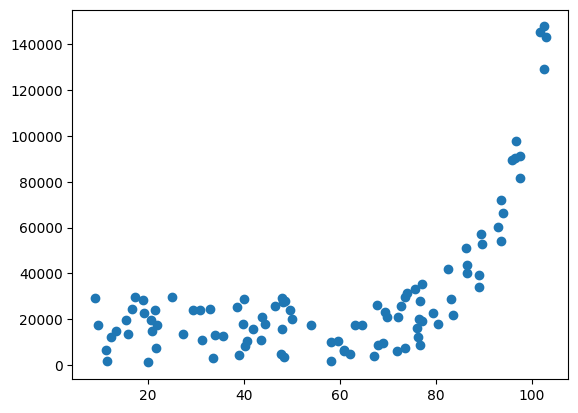

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
start_time = time()
linear = LinearRegression().fit(X, y)
used_time = time() - start_time
used_time

0.0028388500213623047

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


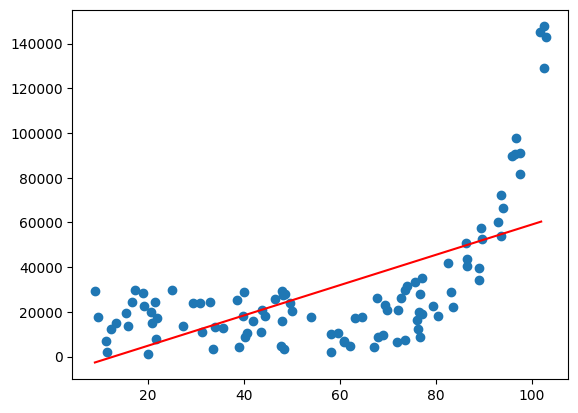

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
plt.scatter(X, y)
plt.plot(xx, yy, c='r')

In [ ]:
linear.score(X, y)

0.37467360318911636

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation2 = PolynomialFeatures(degree=2)
transformation5 = PolynomialFeatures(degree=5)
transformation10 = PolynomialFeatures(degree=10)
transformation100 = PolynomialFeatures(degree=100)

In [ ]:
transformation2.fit(X)
transformation5.fit(X)
transformation10.fit(X)
transformation100.fit(X)

PolynomialFeatures(degree=100)

In [ ]:
X_2 = transformation2.transform(X)
X_5 = transformation5.transform(X)
X_10 = transformation10.transform(X)
X_100 = transformation100.transform(X)

In [ ]:
X_2.shape

(100, 3)

In [ ]:
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [ ]:
X[:5]

x
0  96.597780
1  48.002892
2  47.939756
3  47.809026
4  69.784427

In [ ]:
start_time = time()
poly_2d = LinearRegression().fit(X_2, y)
used_time = time() - start_time
print("degree 2: time", used_time, " score", poly_2d.score(X_2, y))
start_time = time()
poly_5d = LinearRegression().fit(X_5, y)
used_time = time() - start_time
print("degree 5: time", used_time, " score", poly_5d.score(X_5, y))
start_time = time()
poly_10d = LinearRegression().fit(X_10, y)
used_time = time() - start_time
print("degree 10: time", used_time, " score", poly_10d.score(X_10, y))
start_time = time()
poly_100d = LinearRegression().fit(X_100, y)
used_time = time() - start_time
print("degree 100: time", used_time, " score", poly_100d.score(X_100, y))

degree 2: time 0.0015459060668945312  score 0.7359753787024842
degree 5: time 0.0046787261962890625  score 0.9217478060447024
degree 10: time 0.0011296272277832031  score 0.922246825146204
degree 100: time 0.002936124801635742  score 0.7924620004697547


In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


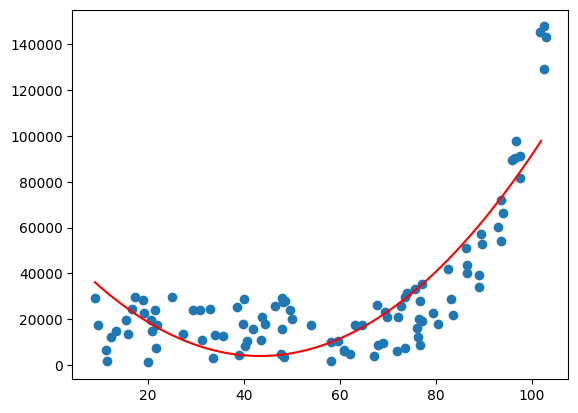

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X, y)
plt.plot(xx, yy_2d, c='r')

##Классификация

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
data.head()

x1        x2  y
0  0.048289  0.267592  1
1  1.363151  0.171123  0
2 -0.424253  0.893937  0
3  0.112344  0.565672  0
4 -1.262453  0.521735  0

In [ ]:
y = data.y
X = data.drop(["y"], axis=1)
y.shape, X.shape

((250,), (250, 2))

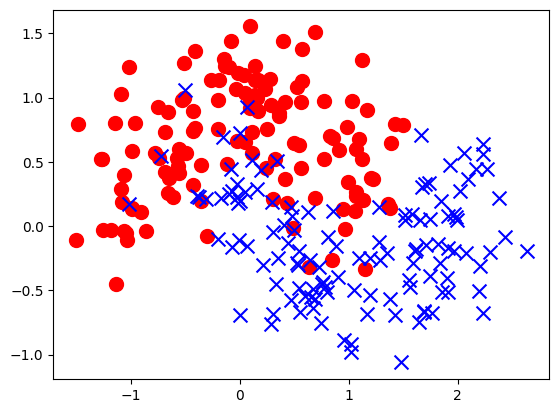

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

In [ ]:
logistic.score(X, y)

0.832

<ipython-input-10-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-10-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


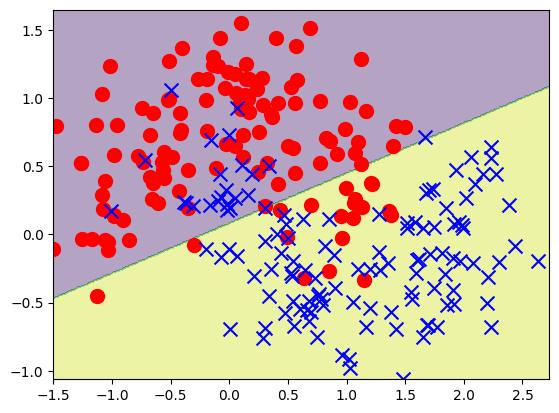

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
class_transform_2 = PolynomialFeatures(degree=2, include_bias=False)
class_transform_5 = PolynomialFeatures(degree=5, include_bias=False)
class_transform_10 = PolynomialFeatures(degree=10, include_bias=False)
class_transform_100 = PolynomialFeatures(degree=100, include_bias=False)
X_2 = class_transform_2.fit_transform(X)
X_5 = class_transform_5.fit_transform(X)
X_10 = class_transform_10.fit_transform(X)
X_100 = class_transform_100.fit_transform(X)

In [ ]:
X.head()

x1        x2
0  0.048289  0.267592
1  1.363151  0.171123
2 -0.424253  0.893937
3  0.112344  0.565672
4 -1.262453  0.521735

In [ ]:
X_2

array([[ 0.04828854,  0.26759214,  0.00233178,  0.01292163,  0.07160555],
       [ 1.36315053,  0.17112252,  1.85817938,  0.23326576,  0.02928292],
       [-0.42425336,  0.89393713,  0.17999091, -0.37925583,  0.79912359],
       ...,
       [-1.05945024,  0.39498604,  1.1224348 , -0.41846805,  0.15601397],
       [ 0.96003127, -0.8871434 ,  0.92166003, -0.8516854 ,  0.7870234 ],
       [-0.42949493,  0.32184423,  0.18446589, -0.13823046,  0.10358371]])

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


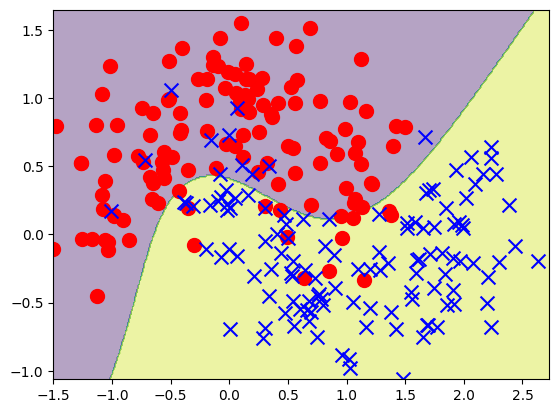

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

In [ ]:
start_time = time()
class_2 = LogisticRegression().fit(X_2, y)
used_time = time() - start_time
print("degree 2: time", used_time, " score", class_2.score(X_2, y))
start_time = time()
class_5 = LogisticRegression().fit(X_5, y)
used_time = time() - start_time
print("degree 5: time", used_time, " score", class_5.score(X_5, y))
start_time = time()
class_10 = LogisticRegression().fit(X_10, y)
used_time = time() - start_time
print("degree 10: time", used_time, " score", class_10.score(X_10, y))
start_time = time()
class_100 = LogisticRegression().fit(X_100, y)
used_time = time() - start_time
print("degree 100: time", used_time, " score", class_100.score(X_100, y))

degree 2: time 0.005570411682128906  score 0.836
degree 5: time 0.006937742233276367  score 0.916
degree 10: time 0.012963294982910156  score 0.924
degree 100: time 0.14747834205627441  score 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Регрессия на реальных данных

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
data_kc_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
start_time = time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
used_time = time() - start_time
print(used_time)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.018171072006225586


0.6997471890109161

In [ ]:
coefficients = reg_kc_multiple.coef_
feature_names = X_kc_prices.columns
sorted_coef = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
for name, coef in sorted_coef:
    print(f"{name}: {coef:.4f}")

lat: 602748.2264
waterfront: 582960.4584
long: -214729.8283
grade: 95890.4452
view: 52870.9424
bathrooms: 41144.2785
bedrooms: -35766.5414
condition: 26385.6491
floors: 6689.5501
yr_built: -2620.2232
zipcode: -582.4199
sqft_living: 110.4429
sqft_above: 70.7852
sqft_basement: 39.6576
sqft_living15: 21.6814
yr_renovated: 19.8126
sqft_lot15: -0.3826
sqft_lot: 0.1286


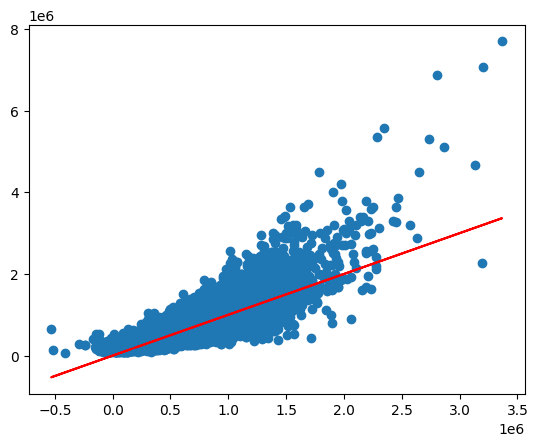

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
start_time = time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
used_time = time() - start_time
print(used_time)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

6.168520450592041


0.8326020796539212

In [ ]:
feature_names = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)
sorted_coef = sorted(zip(feature_names, reg_poly2_kc.coef_), key=lambda x: abs(x[1]), reverse=True)
for name, coef in sorted_coef[:20]:
    print(f"{name}: {coef:.2f}")

sqft_living^2 long: -0.06
sqft_living sqft_above long: -0.05
yr_built zipcode long: 0.04
sqft_above^2 long: -0.04
sqft_living long sqft_living15: -0.04
yr_built zipcode lat: -0.03
sqft_living^2 lat: 0.03
sqft_above long sqft_living15: -0.03
sqft_above yr_built^2: 0.02
sqft_living yr_built^2: 0.02
long sqft_living15^2: -0.02
sqft_living sqft_above lat: 0.02
floors sqft_living15^2: -0.02
sqft_lot sqft_lot15: -0.02
sqft_above^2 lat: 0.02
sqft_living floors sqft_living15: -0.02
view sqft_basement sqft_living15: 0.02
bedrooms sqft_living15^2: 0.02
yr_built^2 sqft_living15: -0.02
sqft_living view sqft_living15: 0.02


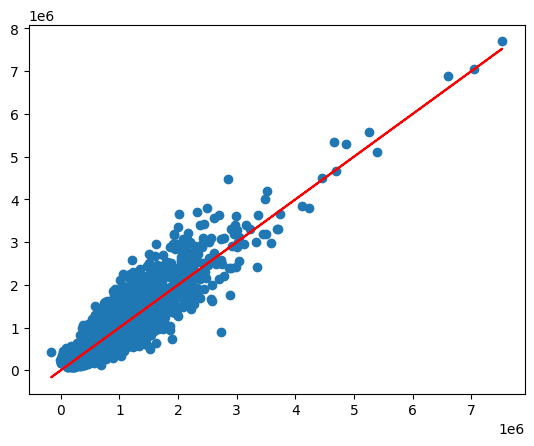

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
X_5_kc_prices = (poly_features_5d_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X_kc_prices)
#X_6_kc_prices = (poly_features_6d_kc_prices := PolynomialFeatures(degree=6)).fit_transform(X_kc_prices)
#X_100_kc_prices = (poly_features_100d_kc_prices := PolynomialFeatures(degree=100)).fit_transform(X_kc_prices)

при запуске модели выше пятого порядка объём ОЗУ исчерпан

In [ ]:
start_time = time()
reg_poly5_kc = LinearRegression().fit(X_5_kc_prices, y_kc_prices)
used_time = time() - start_time
print(used_time)
reg_poly5_kc.score(X_5_kc_prices, y_kc_prices)

даже модель пятого порядка исчерпывает объём ОЗУ

#Метод опорных векторов

##Линейно разделимые данные

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

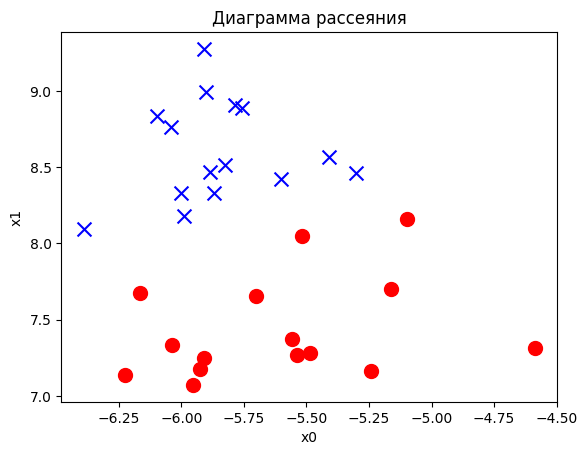

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

Аругмент С влияет на регуляризацию, т. е. на ширину зазора между классами

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

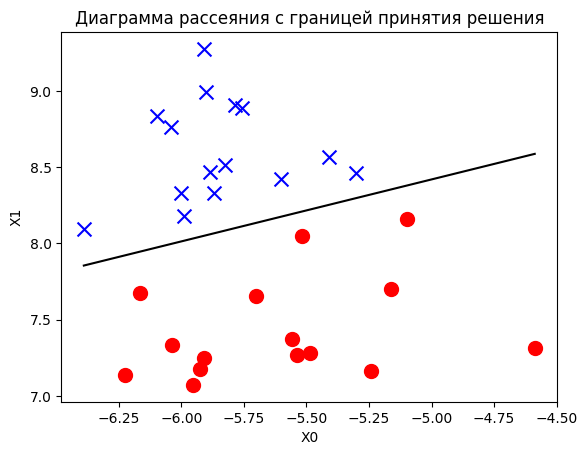

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_

array([1, 2], dtype=int32)

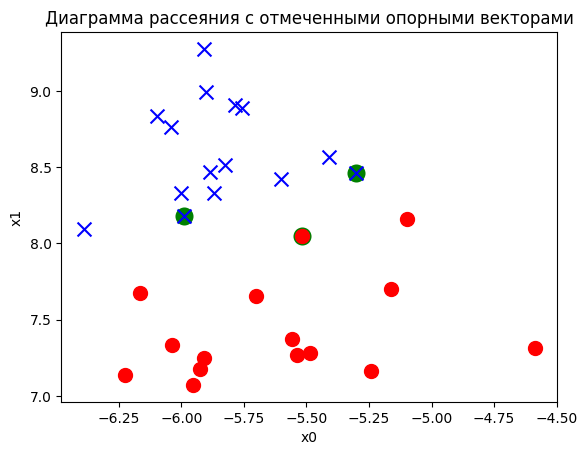

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

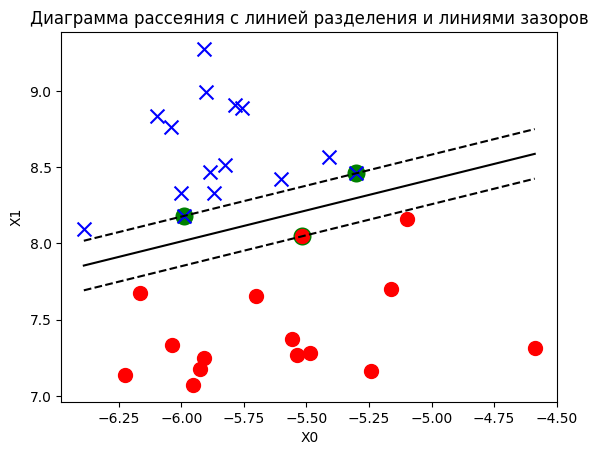

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

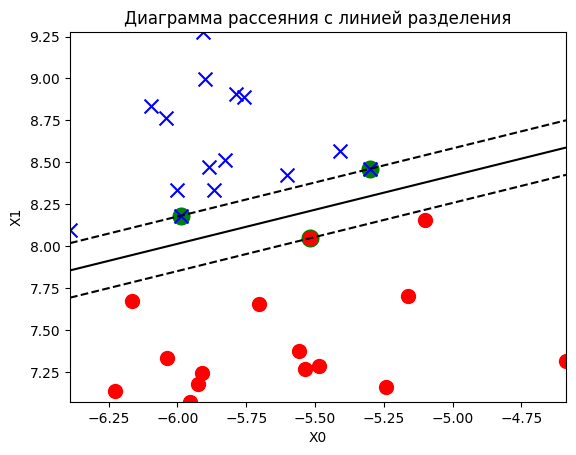

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

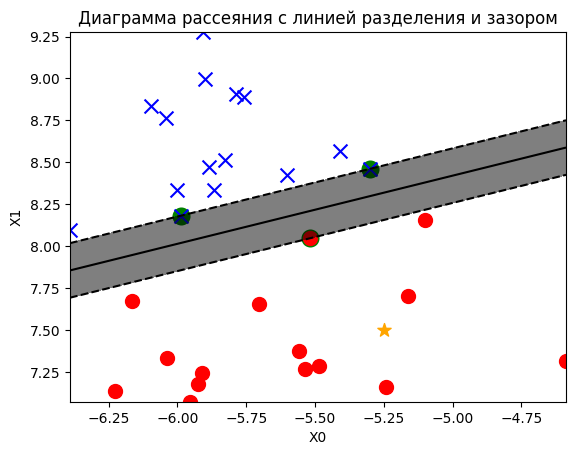

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

Точки внутри зазора (-1 < decision < 1) классифицируются, но с меньшей уверенностью.

Переход границы (decision = 0) меняет предсказанный класс.

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

##Линейно неразделимые данные с зазором

In [ ]:
from sklearn.datasets import make_circles

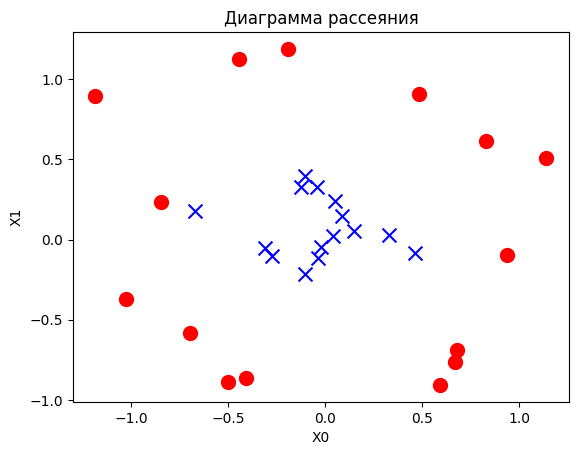

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
print(svm_rbf.n_support_)
print(svm_rbf.support_)
svm_rbf.support_vectors_

[6 2]
[11 20 21 23 28 29 25 27]


array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

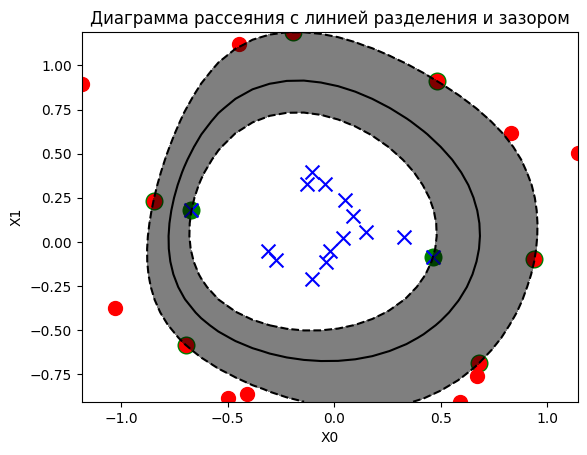

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

1.0
[[15  0]
 [ 0 15]]


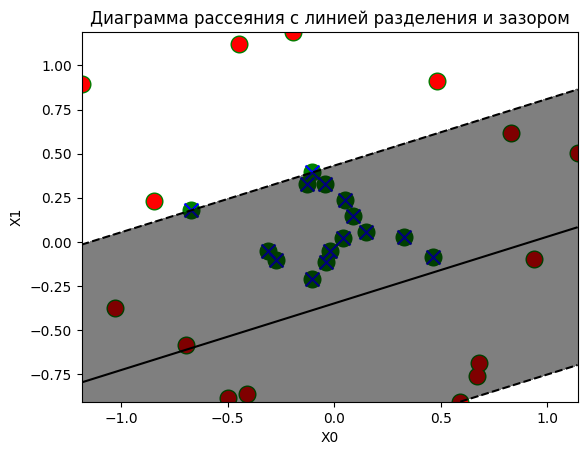

In [ ]:
svm_linear = SVC(kernel='linear', C=100).fit(X, y)
plot_decision_regions(X, y, svm_linear)

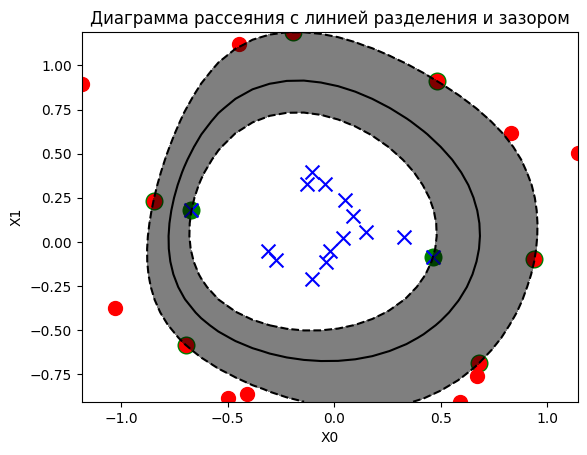

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100, gamma='scale').fit(X, y)
plot_decision_regions(X, y, svm_rbf)

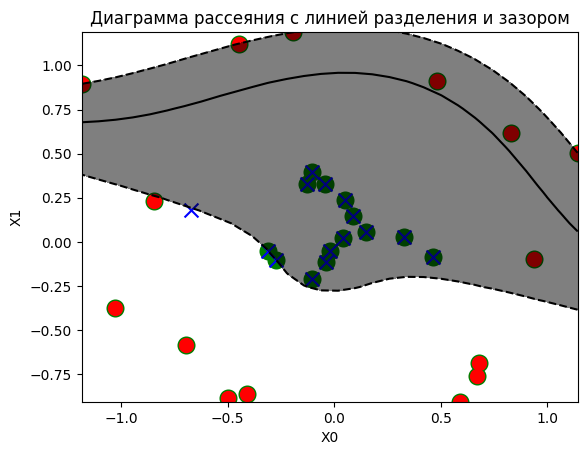

In [ ]:
svm_poly = SVC(kernel='poly', C=100, degree=3).fit(X, y)
plot_decision_regions(X, y, svm_poly)

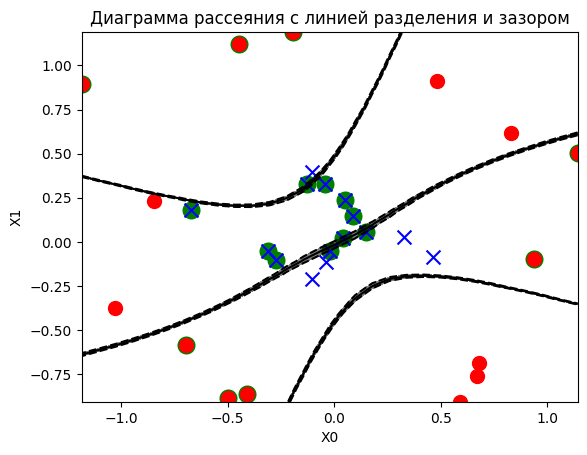

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid', C=100).fit(X, y)
plot_decision_regions(X, y, svm_sigmoid)

In [ ]:
models = {
    'Linear': svm_linear,
    'RBF': svm_rbf,
    'Poly (degree=3)': svm_poly,
    'Sigmoid': svm_sigmoid
}

for name, model in models.items():
    y_pred = model.predict(X)
    print(f"\n{name} ядро:")
    print(f"Accuracy: {metrics.accuracy_score(y, y_pred):.2f}")
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y, y_pred))


Linear ядро:
Accuracy: 0.70
Confusion Matrix:
[[ 6  9]
 [ 0 15]]

RBF ядро:
Accuracy: 1.00
Confusion Matrix:
[[15  0]
 [ 0 15]]

Poly (degree=3) ядро:
Accuracy: 0.70
Confusion Matrix:
[[ 6  9]
 [ 0 15]]

Sigmoid ядро:
Accuracy: 0.50
Confusion Matrix:
[[7 8]
 [7 8]]


##Данные без зазора

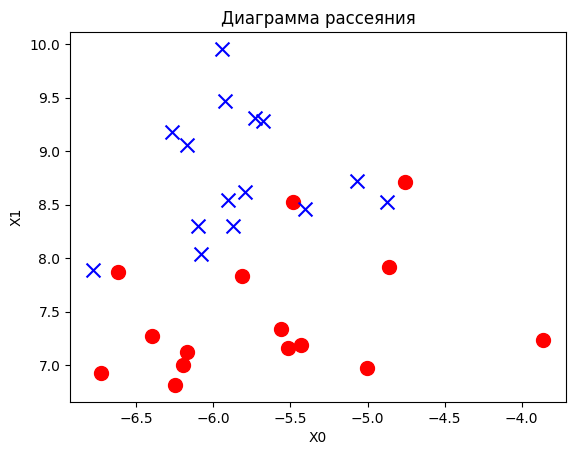

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=100).fit(X, y)

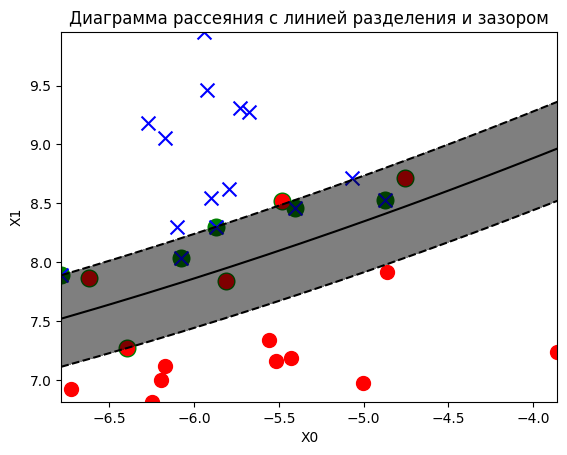

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([5, 5], dtype=int32)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = svm_poly.predict(X)

In [ ]:
print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

0.9
[[12  3]
 [ 0 15]]


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
linear_svc = LinearSVC(C=1.0, penalty='l2', loss='squared_hinge', fit_intercept=True)
linear_svc.fit(X, y)

LinearSVC()

In [ ]:
def plot_linear_svc_boundary(X, y, model):
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    # Граница решения (w0*x0 + w1*x1 + b = 0)
    w = model.coef_[0]
    b = model.intercept_[0]
    x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x1 = -(w[0] * x0 + b) / w[1]  # Решаем уравнение w0*x0 + w1*x1 + b = 0 относительно x1

    plt.plot(x0, x1, 'k-', label='Decision Boundary')
    plt.title(f'LinearSVC (C={model.C})')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

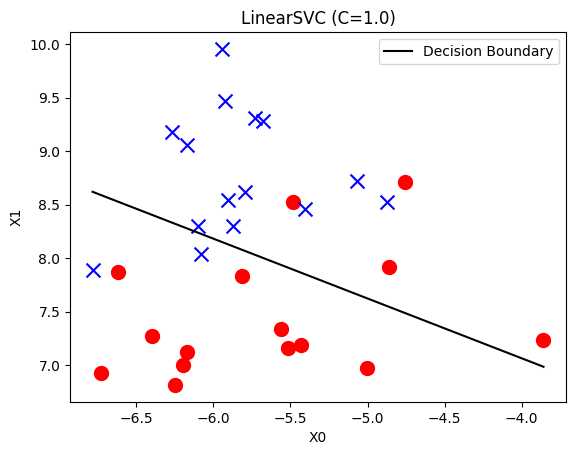

In [ ]:
plot_linear_svc_boundary(X, y, linear_svc)

In [ ]:
y_pred = linear_svc.predict(X)
print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

0.8
[[11  4]
 [ 2 13]]


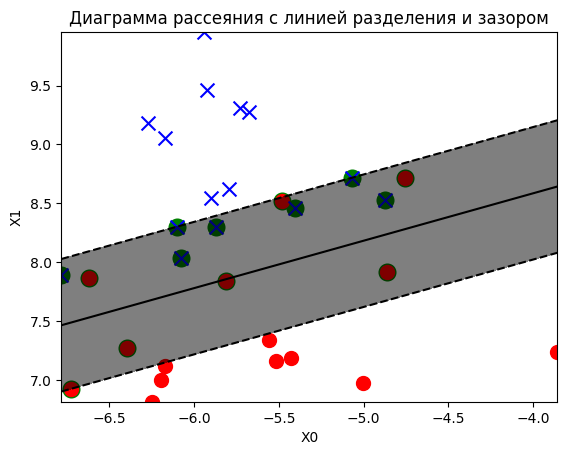

In [ ]:
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X, y)
plot_decision_regions(X, y, svc_linear)

In [ ]:
y_pred = svc_linear.predict(X)
print(metrics.accuracy_score(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

0.9
[[12  3]
 [ 0 15]]


##Доп задания 6-10

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=1,
    n_classes=2,
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C_values = [0.1, 1, 10, 100]

best_accuracy = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C, random_state=42)
        model.fit(X_scaled, y)

        y_pred = model.predict(X_scaled)
        accuracy = accuracy_score(y, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'kernel': kernel, 'C': C}

        print(f"Ядро: {kernel}, C: {C}, Точность: {accuracy:.3f}")

print("\nЛучшие параметры:")
print(f"Ядро: {best_params['kernel']}, C: {best_params['C']}")
print(f"Лучшая точность: {best_accuracy:.3f}")

final_model = SVC(kernel=best_params['kernel'], C=best_params['C'], random_state=42)
final_model.fit(X_scaled, y)

Ядро: linear, C: 0.1, Точность: 0.919
Ядро: linear, C: 1, Точность: 0.915
Ядро: linear, C: 10, Точность: 0.915
Ядро: linear, C: 100, Точность: 0.915
Ядро: rbf, C: 0.1, Точность: 0.945
Ядро: rbf, C: 1, Точность: 0.949
Ядро: rbf, C: 10, Точность: 0.962
Ядро: rbf, C: 100, Точность: 0.973
Ядро: poly, C: 0.1, Точность: 0.922
Ядро: poly, C: 1, Точность: 0.940
Ядро: poly, C: 10, Точность: 0.942
Ядро: poly, C: 100, Точность: 0.948
Ядро: sigmoid, C: 0.1, Точность: 0.889
Ядро: sigmoid, C: 1, Точность: 0.823
Ядро: sigmoid, C: 10, Точность: 0.811
Ядро: sigmoid, C: 100, Точность: 0.809

Лучшие параметры:
Ядро: rbf, C: 100
Лучшая точность: 0.973


SVC(C=100, random_state=42)

In [ ]:
sample_sizes = [1000, 5000, 10000, 20000, 50000]
for i in sample_sizes:
  X, y = make_classification(
        n_samples=i,
        n_features=5,
        n_informative=3,
        n_redundant=1,
        n_classes=2,
        random_state=42
    )
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  model = SVC(kernel="rbf", C=100, random_state=42)
  start_time = time()
  model.fit(X_scaled, y)
  training_time = time() - start_time
  print(f"Размер датасета: {i:,} | Время обучения: {training_time:.2f} сек")

Размер датасета: 1,000 | Время обучения: 0.07 сек
Размер датасета: 5,000 | Время обучения: 1.64 сек
Размер датасета: 10,000 | Время обучения: 3.34 сек
Размер датасета: 20,000 | Время обучения: 2.36 сек
Размер датасета: 50,000 | Время обучения: 81.51 сек


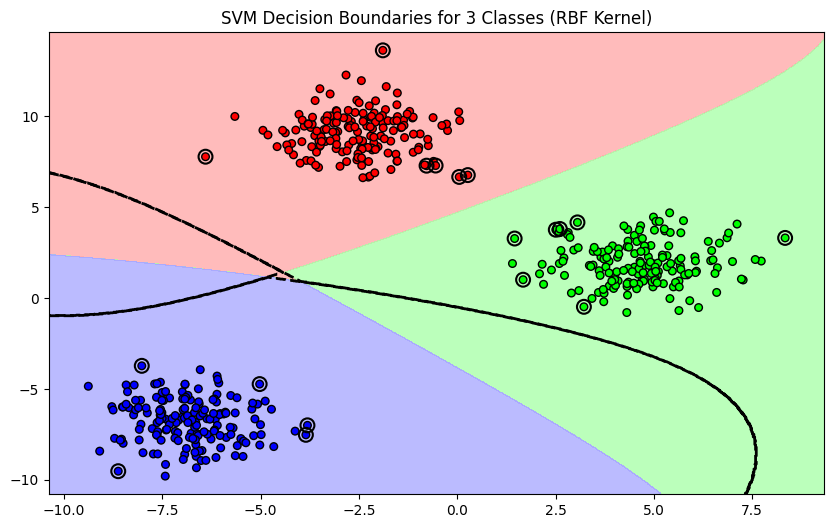

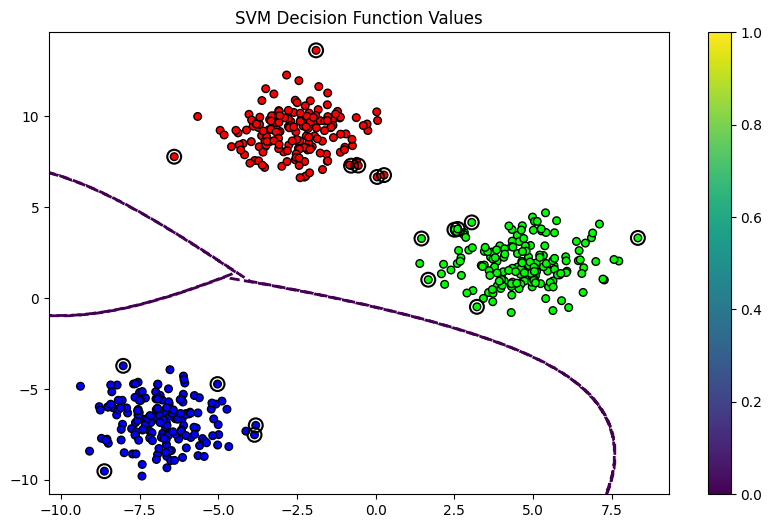

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=1.2, random_state=42)

svm = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
svm.fit(X, y)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def plot_decision_boundaries(X, y, model, xx, yy):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5)

    if hasattr(model, "decision_function"):
        for i in range(len(model.classes_)):
            Z_dec = model.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, i]
            Z_dec = Z_dec.reshape(xx.shape)
            plt.contour(xx, yy, Z_dec, levels=[0], linestyles=['--'], linewidths=2, colors=['k'])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Decision Boundaries for 3 Classes (RBF Kernel)")
    plt.show()

plot_decision_boundaries(X, y, svm, xx, yy)

plt.figure(figsize=(10, 6))
for i in range(len(svm.classes_)):
    Z_dec = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, i]
    Z_dec = Z_dec.reshape(xx.shape)
    plt.contour(xx, yy, Z_dec, levels=[0], linestyles=['--'], linewidths=2)

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='k', linewidths=1.5)
plt.colorbar()
plt.title("SVM Decision Function Values")
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

start_time = time.time()

svm = SVC(kernel='linear')
svm.fit(X_scaled, y)

y_pred = svm.predict(X_scaled)

end_time = time.time()

accuracy = accuracy_score(y, y_pred)
elapsed_time = end_time - start_time

print(f"Accuracy: {accuracy:.4f}")
print(f"time: {elapsed_time:.4f} seconds")

Accuracy: 0.9667
time: 0.0213 seconds


In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svr = SVR(kernel=kernel)
    start_time = time.time()

    svr.fit(X_scaled, y)
    y_pred = svr.predict(X_scaled)

    end_time = time.time()

    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    elapsed_time = end_time - start_time

    print(f"Ядро: {kernel}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.2f}")
    print(f"  Время: {elapsed_time:.4f} секунд\n")


Ядро: linear
  MAE: 43.44
  R2: 0.51
  Время: 0.0341 секунд

Ядро: rbf
  MAE: 56.89
  R2: 0.21
  Время: 0.0469 секунд

Ядро: poly
  MAE: 53.09
  R2: 0.29
  Время: 0.0300 секунд

Ядро: sigmoid
  MAE: 48.97
  R2: 0.41
  Время: 0.0322 секунд



#Многослойный перцептрон

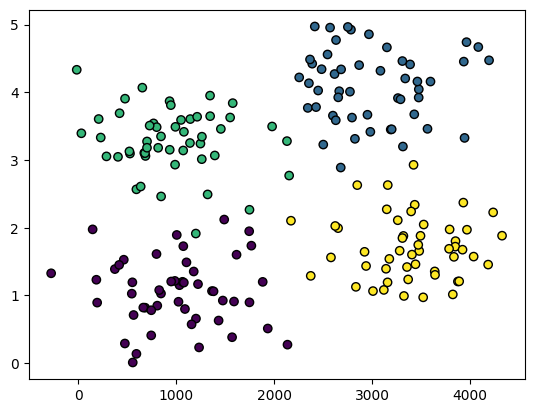

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [ ]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [ ]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

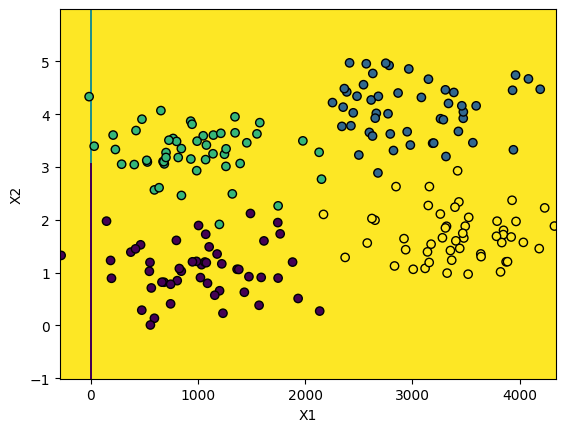

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X_scaled, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

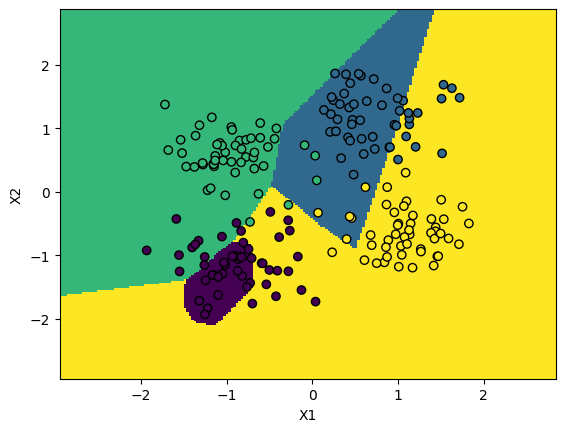

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1, max_iter=10_000).fit(X_scaled, y)

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 2,  3, 45,  0],
       [ 0,  1,  0, 49]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X_scaled))

0.965

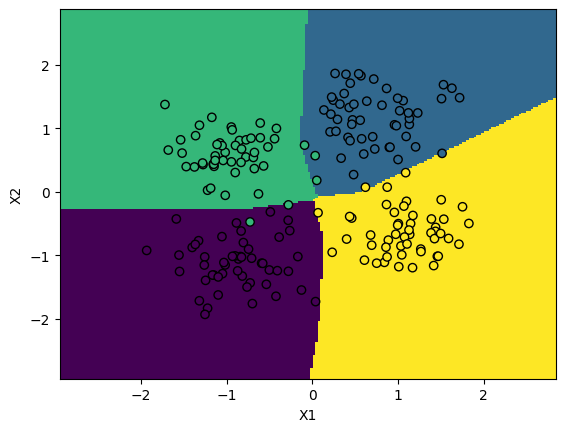

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

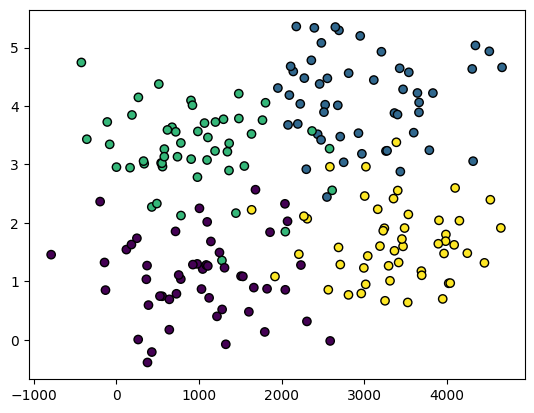

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.7,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 50),
                    random_state=1, max_iter=10000).fit(X_scaled, y)

In [ ]:
accuracy_score(y, clf.predict(X_scaled))

1.0

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0],
       [ 0,  0,  0, 50]])

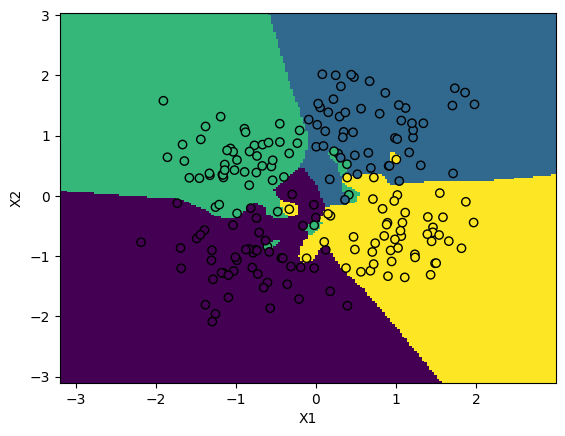

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

##Доп задания

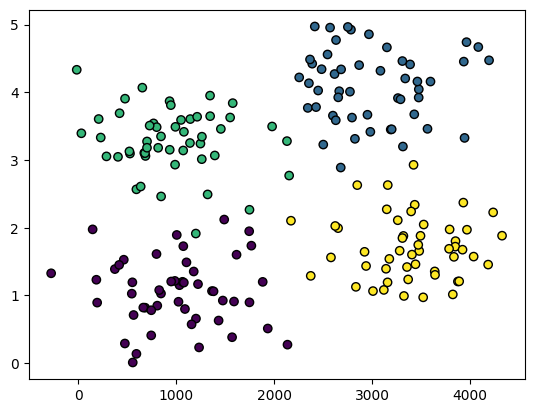

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
neurons_list = [1, 2, 10, 100]
results = {}

for neurons in neurons_list:
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=42)
    mlp.fit(X_scaled, y)
    y_pred = mlp.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    results[neurons] = acc

print("Итоговые результаты ")
for neurons, acc in results.items():
    print(f"{neurons} нейронов -> точность: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Итоговые результаты 
1 нейронов -> точность: 0.3950
2 нейронов -> точность: 0.9750
10 нейронов -> точность: 0.9850
100 нейронов -> точность: 0.9950



- Модель с 1 нейроном слишком проста для задачи с 4 классами, плохо аппроксимирует данные.
- 2 нейрона значительно лучше, но всё ещё есть ошибки.
- При 10 нейронах модель почти идеально аппроксимирует данные, достигая почти 100% точности.
- При 100 нейронах модель полностью выучивает выборку (точность = 100%), что может говорить о переобучении.

---
Для достижения хорошей аппроксимации на данном датасете достаточно около 10 нейронов в одном скрытом слое. Увеличение числа нейронов дальше не улучшает результат, а лишь повышает вероятность переобучения.


In [ ]:
neurons_per_layer = 10
layers_config = {
    "2 слоя": (neurons_per_layer, neurons_per_layer),
    "3 слоя": (neurons_per_layer, neurons_per_layer, neurons_per_layer),
    "10 слоев": tuple([neurons_per_layer]*10)
}

results = {}

for desc, layers in layers_config.items():
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
    mlp.fit(X_scaled, y)
    y_pred = mlp.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    results[desc] = acc

for desc, acc in results.items():
    print(f"{desc}: {acc:.4f}")

2 слоя: 0.9900
3 слоя: 0.9850
10 слоев: 0.9900



1. **2 слоя** — модель хорошо обучается, достигая очень высокой точности.
2. **3 слоя** — точность примерно такая же, как у 2 слоёв, прирост минимален.
3. **10 слоёв** — модель достигает максимальной точности, но количество слоев избыточно для такой простой задачи.

---

Для данного датасета достаточно 2-3 скрытых слоев с 10 нейронами, чтобы добиться максимальной точности. Увеличение числа слоев до 10 не даёт существенного прироста, но увеличивает сложность и время обучения модели.


In [ ]:
import numpy as np

neurons_per_layer = 10
layers = tuple([neurons_per_layer]*10)

mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
mlp.fit(X_scaled, y)

print(f"Количество слоев (скрытых + выходной): {len(mlp.coefs_)}")

for i, (weights, biases) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    print(f"\nСлой {i+1} (weights shape: {weights.shape}, biases shape: {biases.shape})")

    print("Веса (weight matrices):")
    for neuron_idx in range(weights.shape[1]):
        w = weights[:, neuron_idx]
        print(f"  Нейрон {neuron_idx+1} веса: {w}")

    print("Веса смещений (bias vectors):")
    print(biases)


Количество слоев (скрытых + выходной): 11

Слой 1 (weights shape: (2, 10), biases shape: (10,))
Веса (weight matrices):
  Нейрон 1 веса: [ 0.19271677 -0.8863069 ]
  Нейрон 2 веса: [0.69657532 0.82711315]
  Нейрон 3 веса: [0.62522604 0.56585363]
  Нейрон 4 веса: [ 0.63408027 -0.7327936 ]
  Нейрон 5 веса: [-0.32833227 -0.61074011]
  Нейрон 6 веса: [-0.61893024 -0.44759955]
  Нейрон 7 веса: [-0.32674998 -0.55106789]
  Нейрон 8 веса: [ 1.03912996 -0.29066156]
  Нейрон 9 веса: [0.4609254  0.02876516]
  Нейрон 10 веса: [ 0.47989234 -0.44601045]
Веса смещений (bias vectors):
[ 0.06641728 -0.40608682 -0.0715185  -0.04620895 -0.17887507  0.40542948
 -0.49909154  0.12025286  0.34926883 -0.52890781]

Слой 2 (weights shape: (10, 10), biases shape: (10,))
Веса (weight matrices):
  Нейрон 1 веса: [ 0.47102868 -0.46388282  0.64425341  0.02081572  0.40929361  0.45213802
 -0.02029491 -1.03841296 -0.25087354  0.6416243 ]
  Нейрон 2 веса: [-0.49786674  0.31016844  0.78980546 -1.07754755 -0.54266699 -0.19

In [ ]:
import time
models = {
    "1 слой, 10 нейронов": (10,),
    "3 слоя, 10 нейронов": (10, 10, 10),
    "10 слоев, 100 нейронов": (100,) * 10
}

results = {}

for name, layers in models.items():
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
    start = time.time()
    mlp.fit(X_scaled, y)
    end = time.time()
    duration = end - start

    y_pred = mlp.predict(X_scaled)
    acc = accuracy_score(y, y_pred)

    results[name] = {"accuracy": acc, "train_time": duration}
    print(f"{name}: время обучения = {duration:.4f} сек, точность = {acc:.4f}")

1 слой, 10 нейронов: время обучения = 0.5971 сек, точность = 0.9850
3 слоя, 10 нейронов: время обучения = 0.5883 сек, точность = 0.9850
10 слоев, 100 нейронов: время обучения = 3.5324 сек, точность = 1.0000


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

X_scaled = StandardScaler().fit_transform(X)

models = {
    "(10,)": (10,),
    "(10, 10, 10)": (10, 10, 10),
    "(50, 20, 20)": (50, 20, 20)
}

for name, layers in models.items():
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=2000, random_state=42)
    start = time.time()
    mlp.fit(X_scaled, y)
    end = time.time()
    y_pred = mlp.predict(X_scaled)

    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    print("\n", name)
    print(f"time: {end - start:.4f} сек")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)



 (10,)
time: 0.3991 сек
Accuracy: 0.9895
Confusion Matrix:
[[208   4]
 [  2 355]]

 (10, 10, 10)
time: 0.6469 сек
Accuracy: 0.9982
Confusion Matrix:
[[211   1]
 [  0 357]]

 (50, 20, 20)
time: 0.5592 сек
Accuracy: 0.9982
Confusion Matrix:
[[211   1]
 [  0 357]]


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

data = load_diabetes()
X, y = data.data, data.target

X_scaled = StandardScaler().fit_transform(X)

models = {
    "(10,)": (10,),
    "(10, 10, 10)": (10, 10, 10),
    "(50, 20, 20)": (50, 20, 20)
}

for name, layers in models.items():
    model = MLPRegressor(hidden_layer_sizes=layers, max_iter=2000, random_state=42)

    start = time.time()
    model.fit(X_scaled, y)
    end = time.time()
    duration = end - start

    y_pred = model.predict(X_scaled)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    print(f"\n {name}")
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"time: {duration:.4f} сек")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



 (10,)
R²: 0.5075
MSE: 2920.19
MAE: 43.26
time: 2.6903 сек

 (10, 10, 10)
R²: 0.5674
MSE: 2565.47
MAE: 40.43
time: 4.6997 сек

 (50, 20, 20)
R²: 0.7340
MSE: 1577.43
MAE: 30.62
time: 4.6188 сек


#Деревья решений

##Задача классификации

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
RANDOM_SEED = 0

Text(0, 0.5, 'X2')

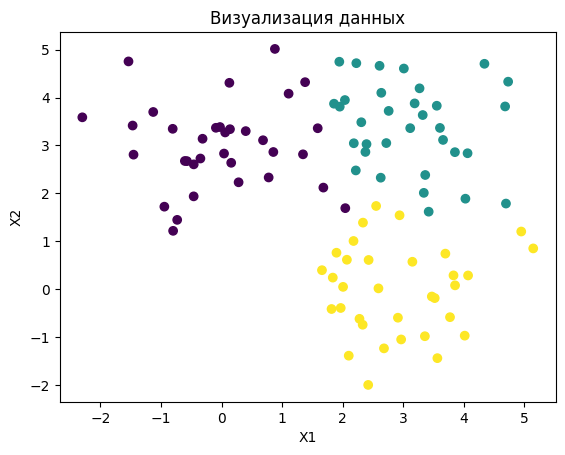

In [ ]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

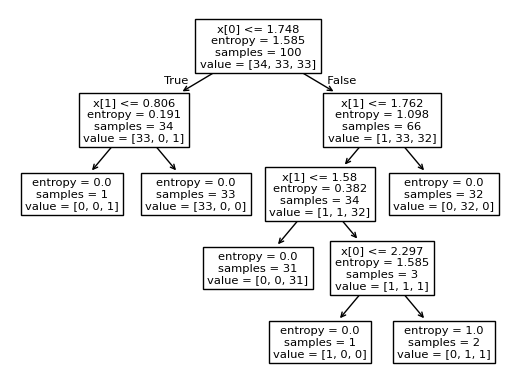

In [ ]:
plot_tree(clf_tree)
plt.show()

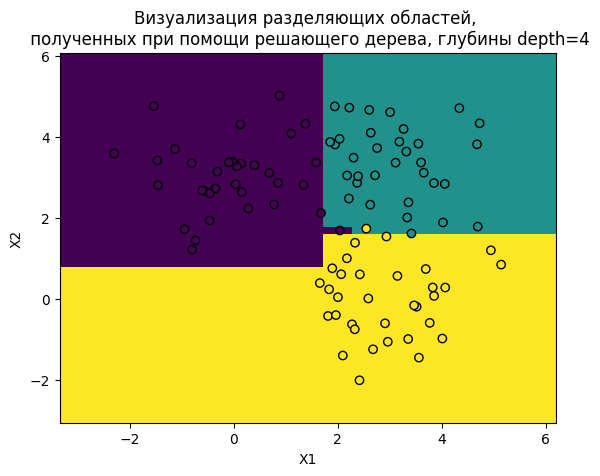

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [ ]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [ ]:
observation_new = [[2, 1]]

In [ ]:
clf_tree.predict(observation_new)

array([2])

##Задача регрессии

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1, 1))
y = np.exp(X[:, 0] ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

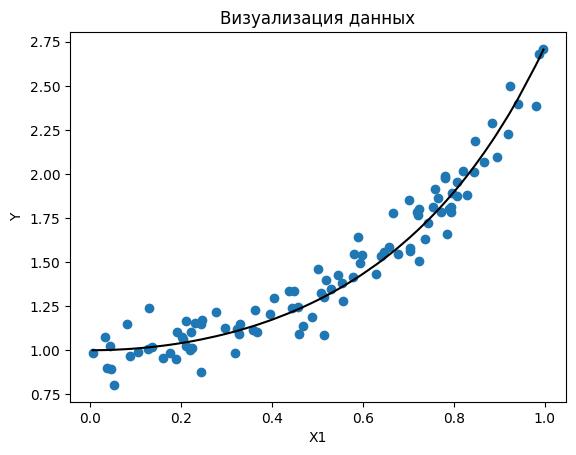

In [ ]:
plt.scatter(X[:, 0], y)

plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c = 'k')

plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('Y');

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

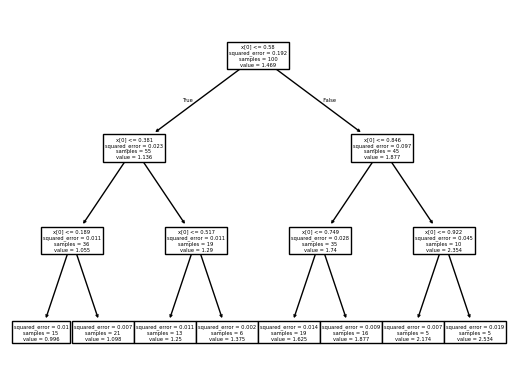

In [ ]:
plot_tree(reg_tree)
plt.show

In [ ]:
y_pred_reg = reg_tree.predict(X)

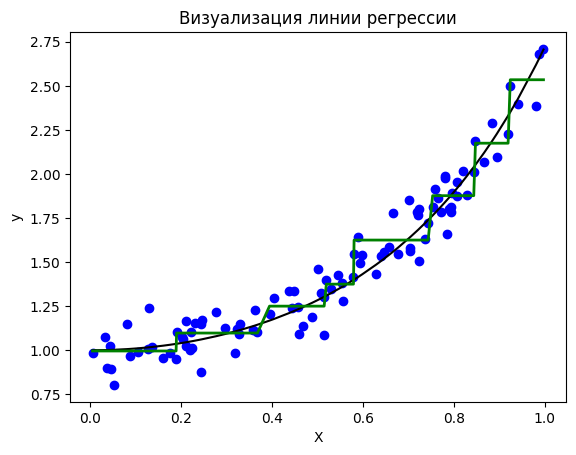

In [ ]:
plt.scatter(X, y, c="b")

plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c = 'k')
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9486281908364873
MSE=  0.009864842321898548


In [ ]:
observation_new = [[0.7]]

In [ ]:
def foo(x):
  if x < 0.4:
    return x * 0.02 + 15
  if x < 0.6:
    return -x * 0.04 + 23
  if x < 0.7:
    return x * 0.01 + 25
  else:
    return 8

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1, 1))
y = np.array(list(map(foo, X[:, 0]))) + np.random.normal(0.0, 0.2, X.shape[0])

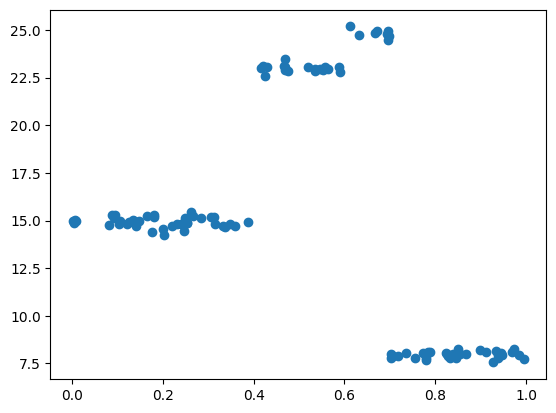

In [ ]:
plt.scatter(X[:, 0], y)
plt.show()

In [ ]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

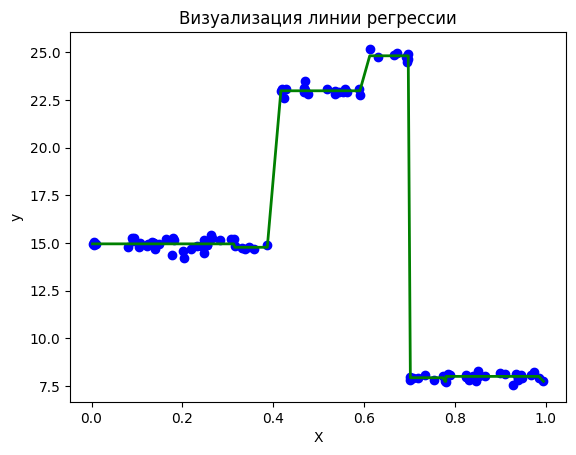

In [ ]:
y_pred_reg = reg_tree.predict(X)
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [ ]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9988439617891197
MSE=  0.041156793126954486


## доп задания

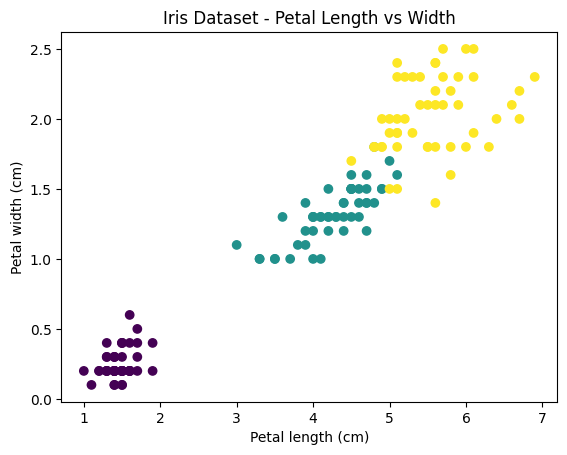

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris Dataset - Petal Length vs Width')
plt.show()


In [2]:
RANDOM_SEED = 0

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

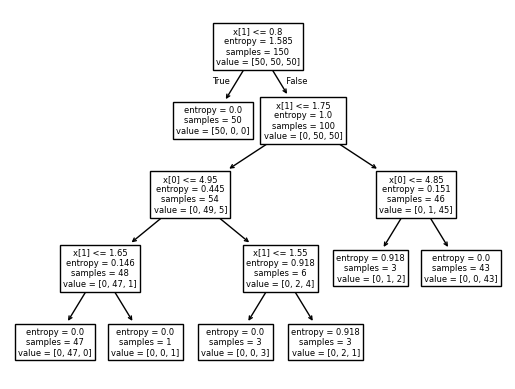

In [5]:
plot_tree(clf_tree)
plt.show()


Модель с глубиной 1:
Accuracy: 0.6667
F1-score: 0.5556
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]

Модель с глубиной 2:
Accuracy: 0.9600
F1-score: 0.9599
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]

Модель с глубиной 3:
Accuracy: 0.9733
F1-score: 0.9733
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Модель с глубиной 4:
Accuracy: 0.9867
F1-score: 0.9867
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]

Модель с глубиной 10:
Accuracy: 0.9933
F1-score: 0.9933
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


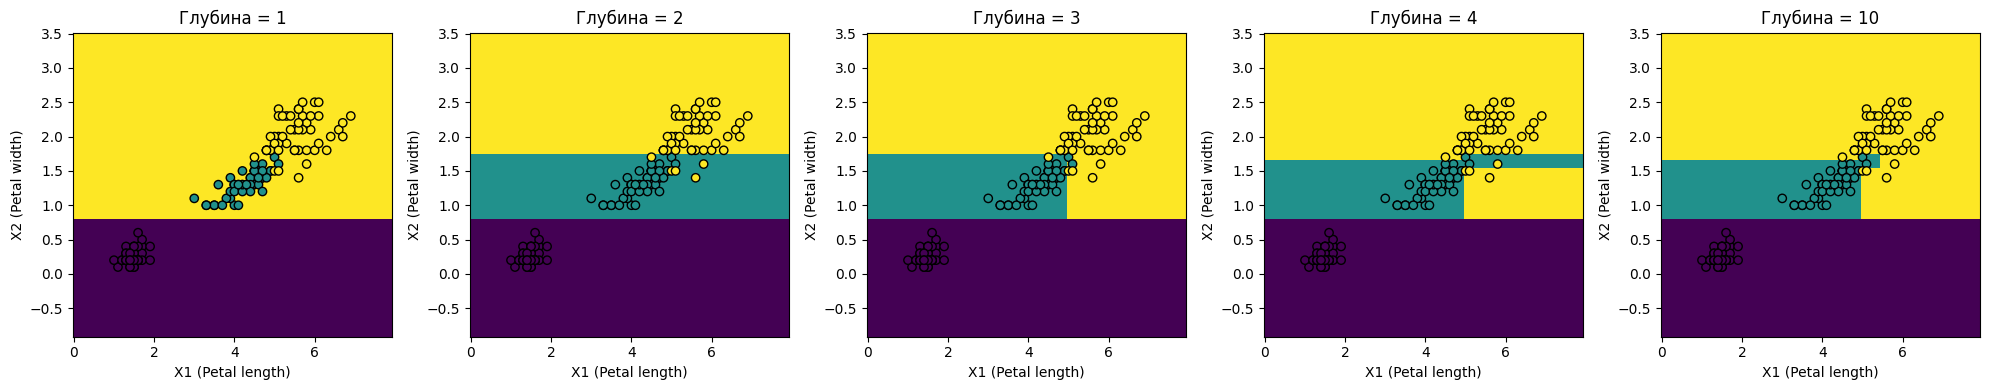

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(20, 4))
for idx, depth in enumerate(depths):
  clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
  clf_tree.fit(X, y)
  y_pred = clf_tree.predict(X)
  accuracy = accuracy_score(y, y_pred)
  f1 = f1_score(y, y_pred, average="weighted")
  cm = confusion_matrix(y, y_pred)
  print(f"\nМодель с глубиной {depth}:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"F1-score: {f1:.4f}")
  print("Confusion Matrix:")
  print(cm)

  plt.subplot(1, len(depths), idx + 1)
  X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
  X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
  X0_grid, X1_grid = np.meshgrid(X0, X1)

  y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

  plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
  plt.title(f'Глубина = {depth}')
  plt.xlabel('X1 (Petal length)')
  plt.ylabel('X2 (Petal width)')
plt.tight_layout()
plt.show()

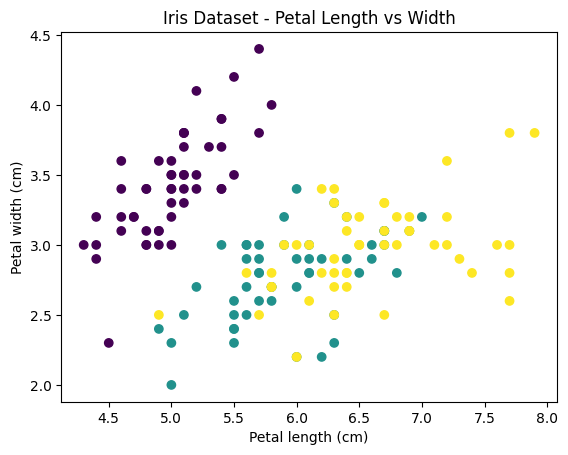

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris Dataset - Petal Length vs Width')
plt.show()

In [14]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

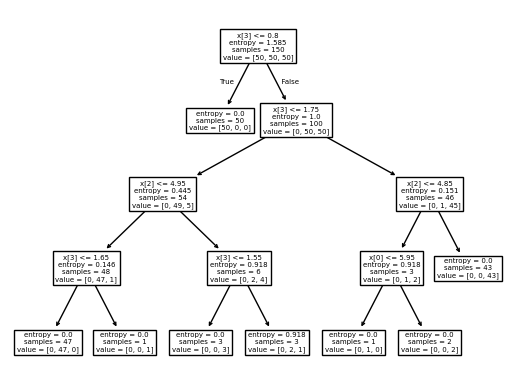

In [15]:
plot_tree(clf_tree)
plt.show()

In [16]:
y_pred = clf_tree.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="weighted")
cm = confusion_matrix(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9933
F1-score: 0.9933
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


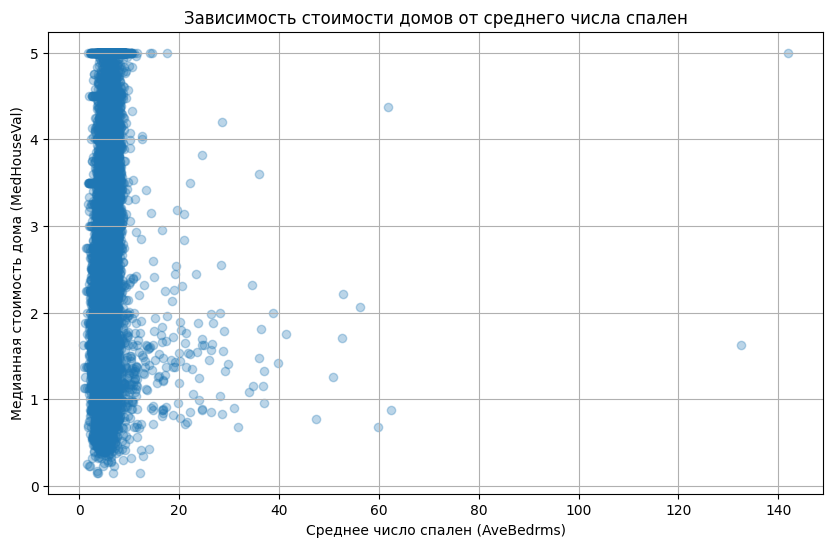

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california.data[:, 2:3]
y = california.target

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3)
plt.title('Зависимость стоимости домов от среднего числа спален')
plt.xlabel('Среднее число спален (AveBedrms)')
plt.ylabel('Медианная стоимость дома (MedHouseVal)')
plt.grid(True)
plt.show()

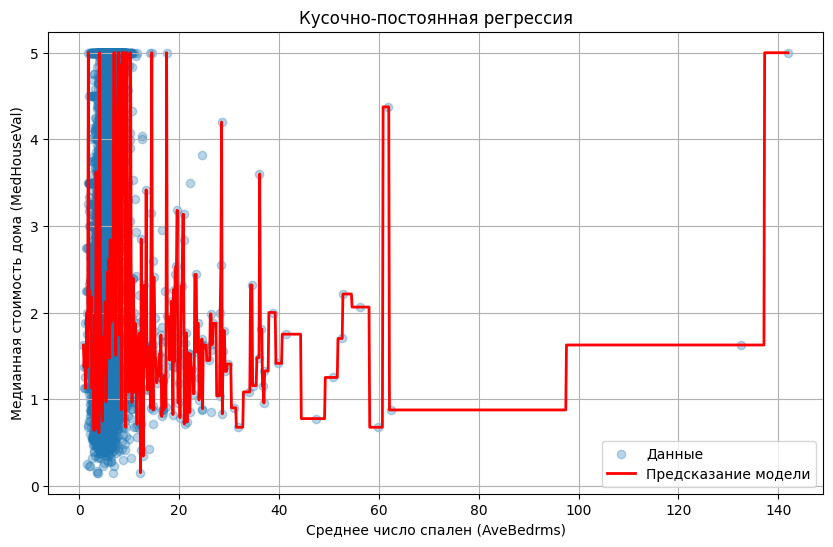


Оценка качества модели:
Среднеквадратичная ошибка (MSE): 0.0616
Коэффициент детерминации (R²): 0.9537

Предсказание для 1.5 спален: 2.75 (в единицах MedHouseVal)


In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

#plt.figure(figsize=(20, 10))
#plot_tree(reg_tree, filled=True, feature_names=['AveBedrms'], rounded=True)
#plt.title("Регрессионное дерево для предсказания стоимости домов")
#plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Данные')

x_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = reg_tree.predict(x_test)
plt.plot(x_test, y_pred, 'r-', linewidth=2, label='Предсказание модели')

plt.title('Кусочно-постоянная регрессия')
plt.xlabel('Среднее число спален (AveBedrms)')
plt.ylabel('Медианная стоимость дома (MedHouseVal)')
plt.legend()
plt.grid(True)
plt.show()

y_pred = reg_tree.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nОценка качества модели:")
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

new_observation = np.array([[1.5]])
prediction = reg_tree.predict(new_observation)
print(f"\nПредсказание для {new_observation[0][0]} спален: {prediction[0]:.2f} (в единицах MedHouseVal)")

Граф дерева решений строился больше 5и минут, пришлось удалить

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

#plt.figure(figsize=(20, 10))
#plot_tree(reg_tree, filled=True, feature_names=feature_names, rounded=True, fontsize=10,proportion=True)
#plt.title("Регрессионное дерево")
#plt.show()

y_pred = reg_tree.predict(X)

print(f"- Среднеквадратичная ошибка (MSE): {mean_squared_error(y, y_pred):.4f}")
print(f"- Средняя абсолютная ошибка (MAE): {mean_absolute_error(y, y_pred):.4f}")
print(f"- Коэффициент детерминации (R²): {r2_score(y, y_pred):.4f}")

- Среднеквадратичная ошибка (MSE): 0.0000
- Средняя абсолютная ошибка (MAE): 0.0000
- Коэффициент детерминации (R²): 1.0000


модель переобучилась

#Метод K ближайших соседей

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [22]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

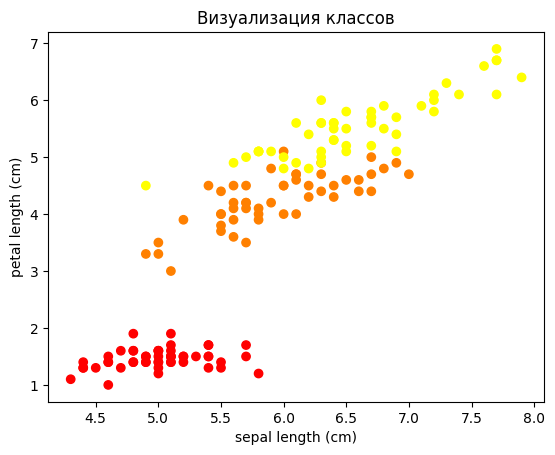

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

y_pred = knn.predict(X)

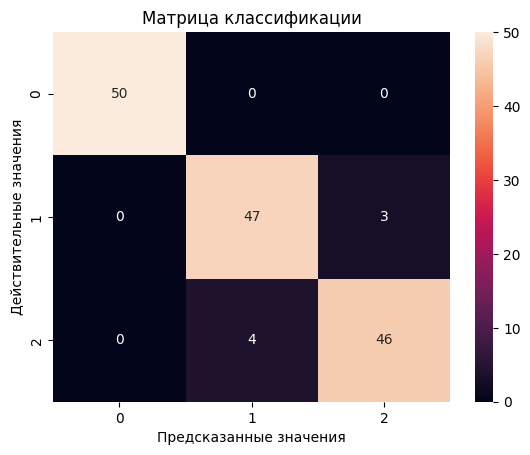

In [6]:
from sklearn.metrics import confusion_matrix
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


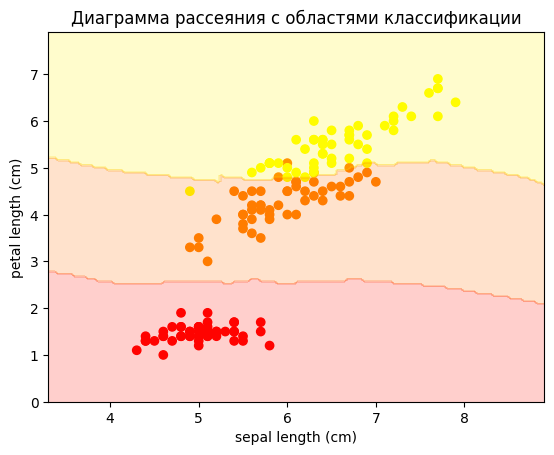

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [8]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
Z = knn.predict(XX).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()
print(classification_report(y_pred, y))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

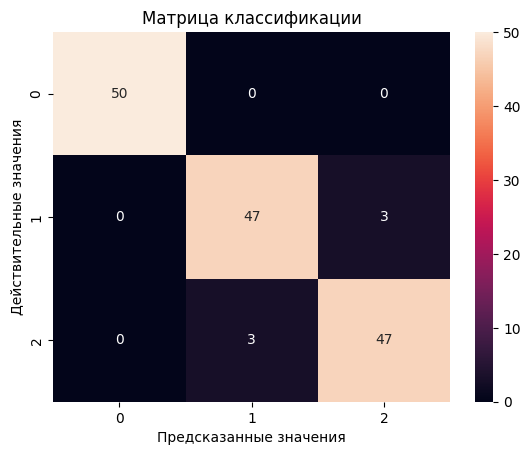

In [11]:
from sklearn.metrics import confusion_matrix
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [13]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [14]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


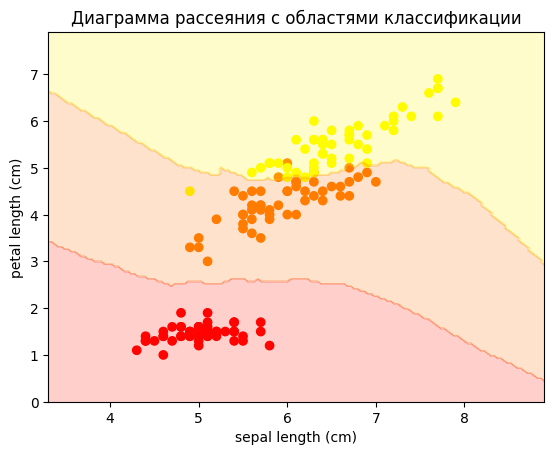

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [15]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()
print(classification_report(y_pred, y))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


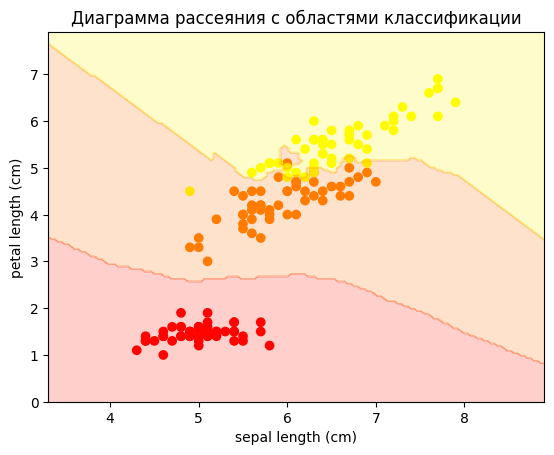

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [17]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
knn.predict(observation_new_scaled)

array([2])

In [31]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [32]:
distances, indices = knn.kneighbors(observation_new_scaled)

In [34]:
knn.kneighbors(observation_new_scaled)

(array([[0.03254042, 0.05555556]]), array([[121, 113]]))

<ipython-input-35-4a323e86ab88>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X.iloc[indices[0]].iloc[0][0], X.iloc[indices[0]].iloc[0][1], marker='+', color='g')
<ipython-input-35-4a323e86ab88>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X.iloc[indices[0]].iloc[1][0], X.iloc[indices[0]].iloc[1][1], marker='+', color='g')


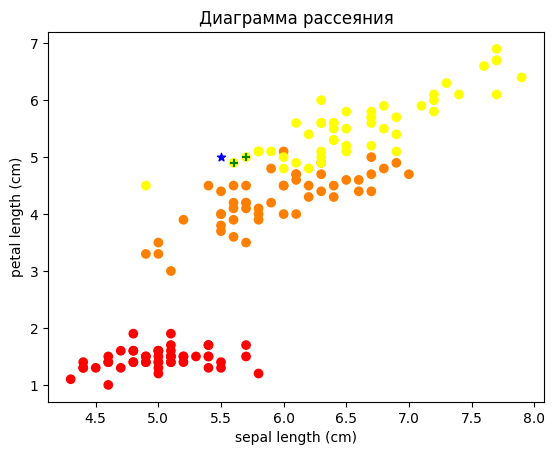

In [35]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

plt.scatter(X.iloc[indices[0]].iloc[0][0], X.iloc[indices[0]].iloc[0][1], marker='+', color='g')
plt.scatter(X.iloc[indices[0]].iloc[1][0], X.iloc[indices[0]].iloc[1][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

##Доп задания

k =  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.85      0.92        59
           2       0.82      1.00      0.90        41

    accuracy                           0.94       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.95      0.94      0.94       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


k =  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


k =  4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


k =  5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


k =  10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.89      0.91        53
           2       0.88      0.94      0.91        47

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


k =  15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        49
           2       0.94      0.92      0.93        51

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


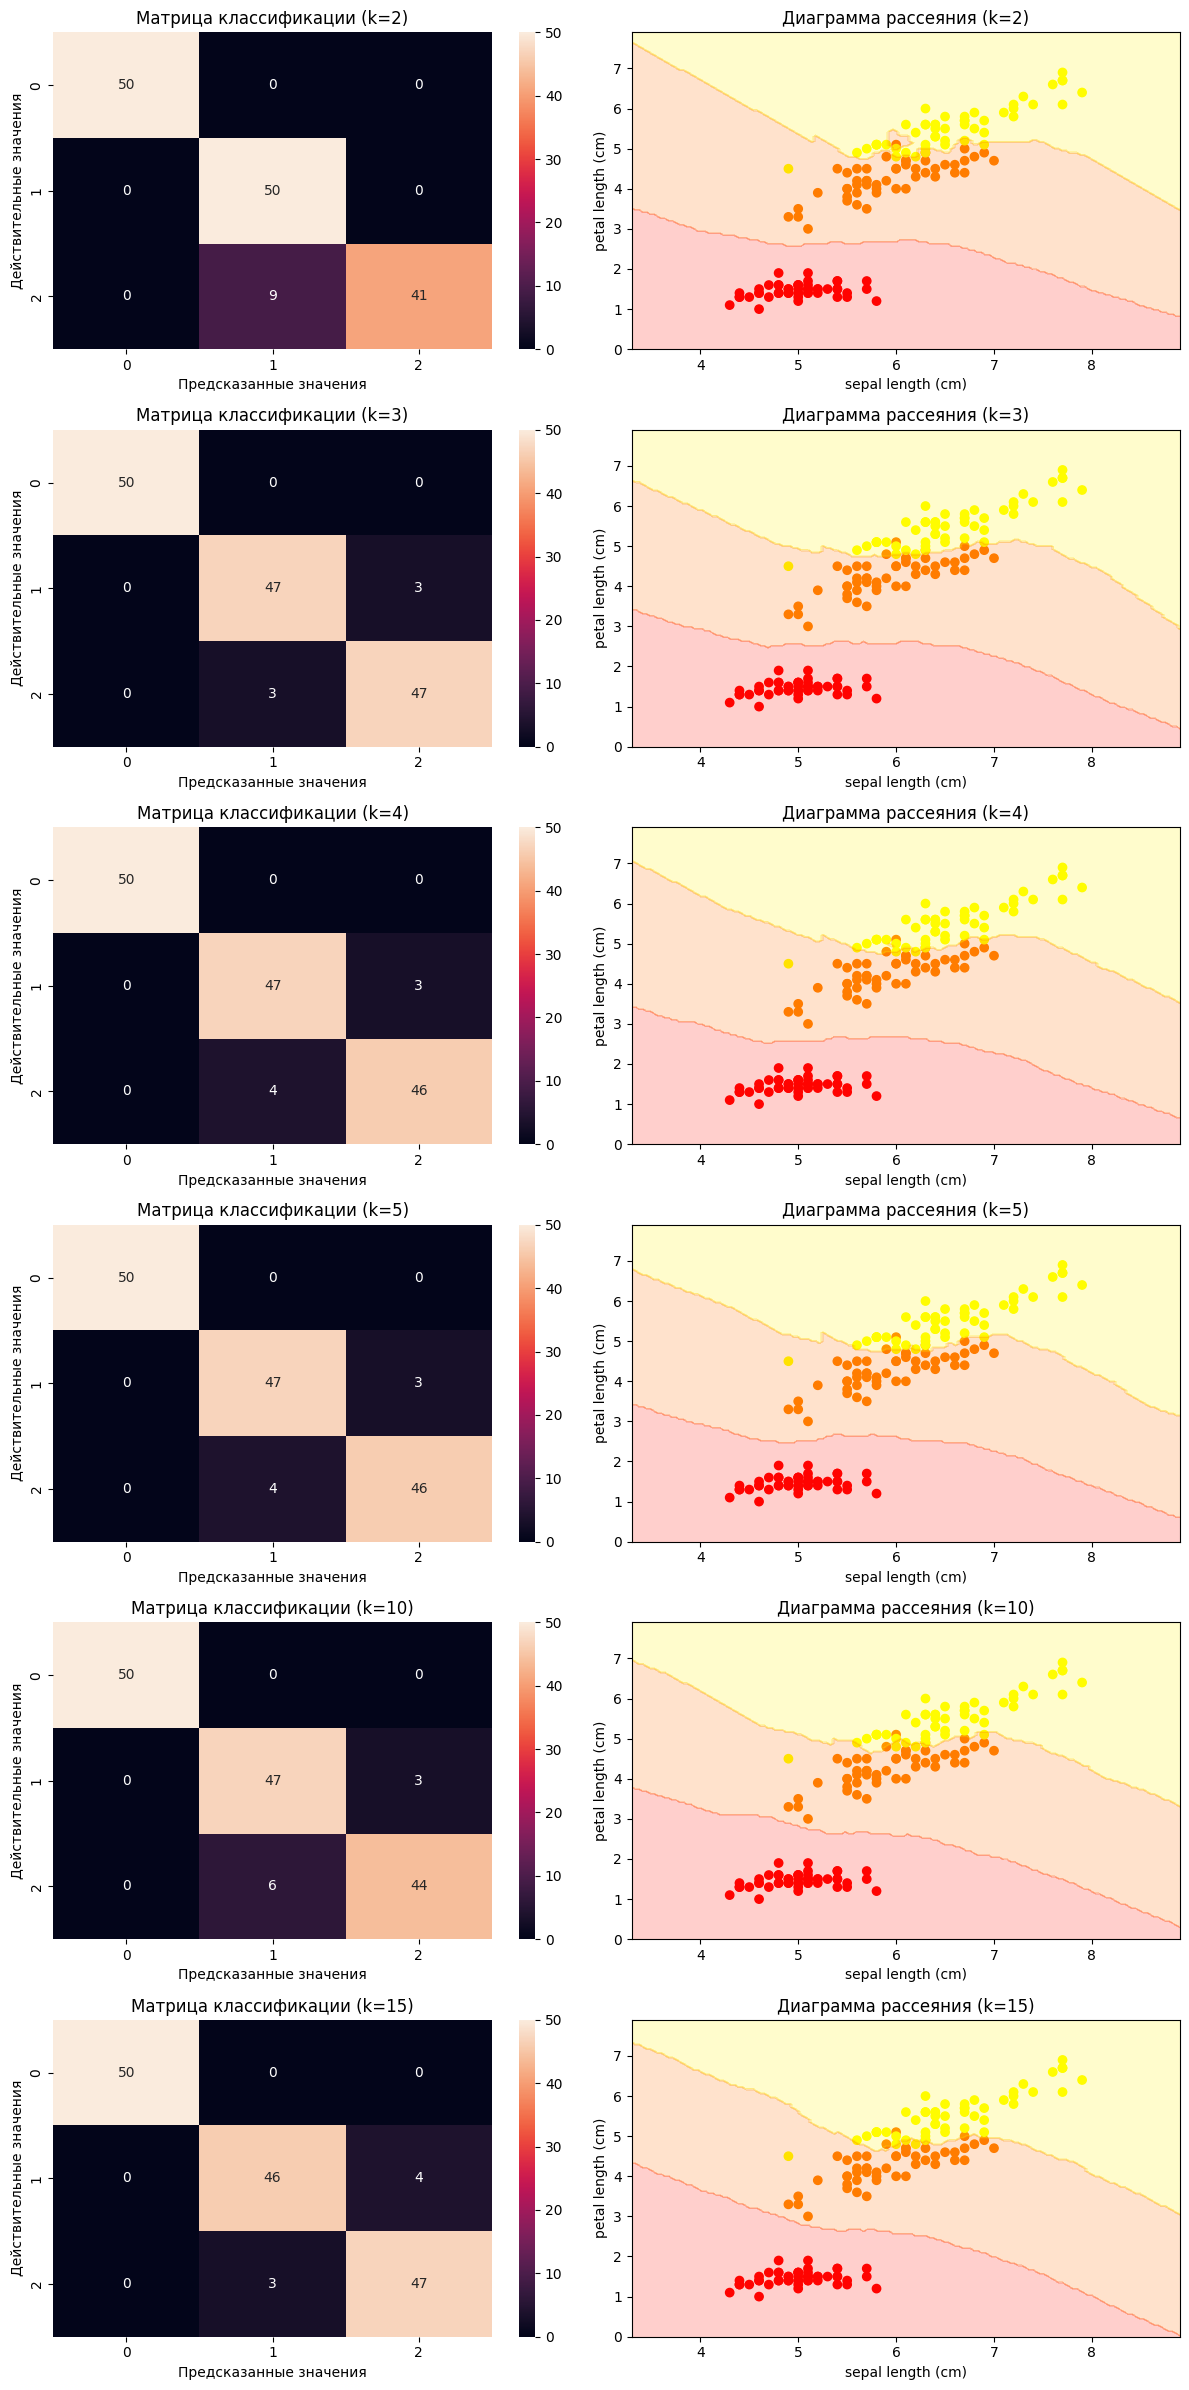

In [40]:
ks = [2, 3, 4, 5, 10, 15]
plt.figure(figsize=(12, 4 * len(ks)))

for idx, i in enumerate(ks, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y)

    y_pred = knn.predict(X_scaled)
    print("k = ", i)
    print(classification_report(y_pred, y))

    plt.subplot(len(ks), 2, 2*idx-1)
    plt.title(f"Матрица классификации (k={i})")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

    plt.subplot(len(ks), 2, 2*idx)
    XX_scaled = scaler.transform(XX)
    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(f"Диаграмма рассеяния (k={i})")

plt.tight_layout()
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

In [49]:
observation_new = [[9.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([2])

In [50]:
observation_new_scaled

array([[1.44444444, 0.6779661 ]])

In [51]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [52]:
knn.kneighbors(observation_new_scaled)

(array([[0.50382192, 0.5336292 , 0.57708069]]), array([[131, 135, 122]]))

<ipython-input-53-0c6b172232cd>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X.iloc[indices[0]].iloc[0][0], X.iloc[indices[0]].iloc[0][1], marker='+', color='g')
<ipython-input-53-0c6b172232cd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X.iloc[indices[0]].iloc[1][0], X.iloc[indices[0]].iloc[1][1], marker='+', color='g')


IndexError: single positional indexer is out-of-bounds

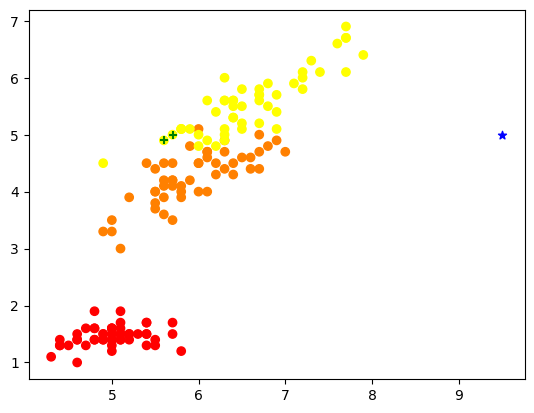

In [53]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

plt.scatter(X.iloc[indices[0]].iloc[0][0], X.iloc[indices[0]].iloc[0][1], marker='+', color='g')
plt.scatter(X.iloc[indices[0]].iloc[1][0], X.iloc[indices[0]].iloc[1][1], marker='+', color='g')
plt.scatter(X.iloc[indices[0]].iloc[2][0], X.iloc[indices[0]].iloc[2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [54]:
X = iris.data
y = iris.target

In [55]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

k =  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.93      0.96        54
           2       0.92      1.00      0.96        46

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150



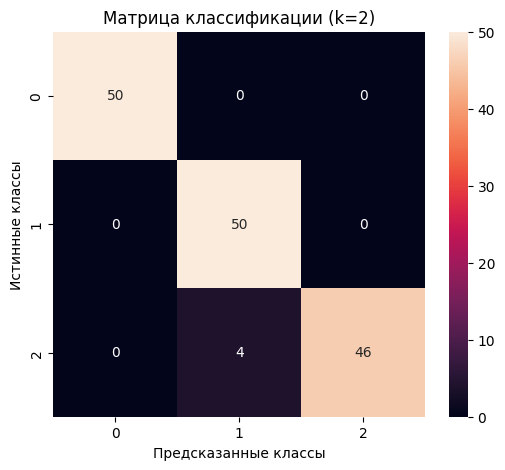

k =  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        51
           2       0.94      0.96      0.95        49

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



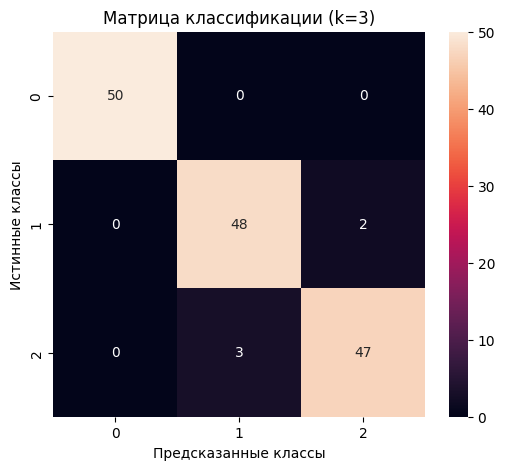

k =  4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        52
           2       0.92      0.96      0.94        48

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



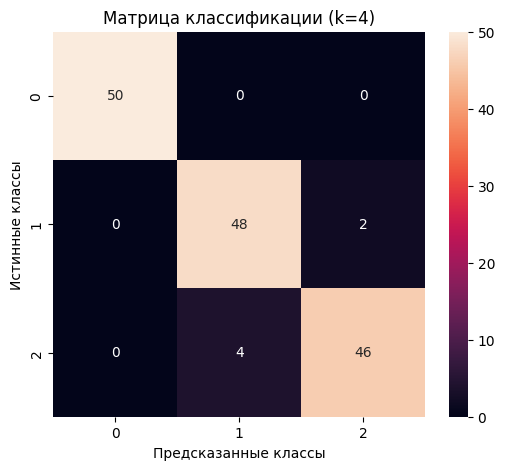

k =  5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        52
           2       0.92      0.96      0.94        48

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



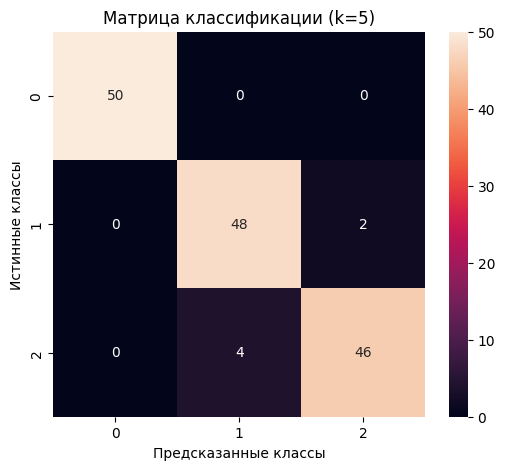

k =  10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        53
           2       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



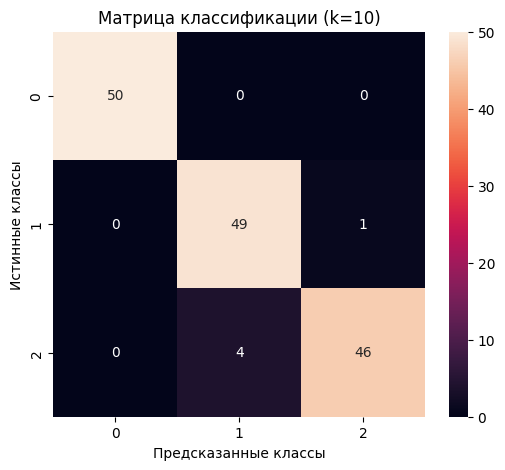

k =  15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        53
           2       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



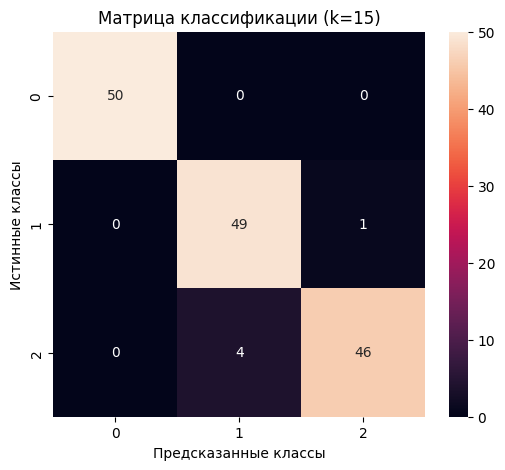

In [69]:
ks = [2, 3, 4, 5, 10, 15]

for idx, i in enumerate(ks, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled, y)

    y_pred = knn.predict(X_scaled)
    print("k = ", i)
    print(classification_report(y_pred, y))

    plt.figure(figsize=(6, 5))
    plt.title(f"Матрица классификации (k={i})")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
    plt.ylabel('Истинные классы')
    plt.xlabel('Предсказанные классы')
    plt.show()

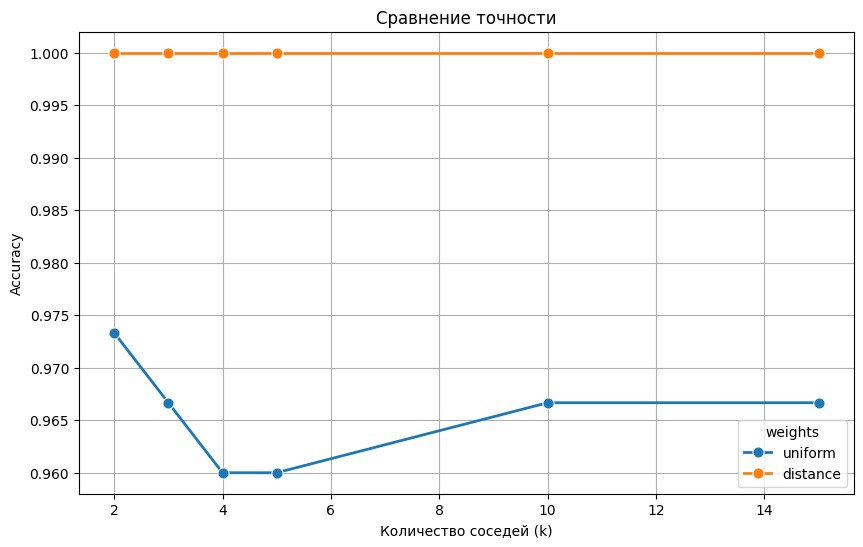


Результаты:
     k   weights  accuracy
1    2  distance  1.000000
0    2   uniform  0.973333
3    3  distance  1.000000
2    3   uniform  0.966667
5    4  distance  1.000000
4    4   uniform  0.960000
7    5  distance  1.000000
6    5   uniform  0.960000
9   10  distance  1.000000
8   10   uniform  0.966667
11  15  distance  1.000000
10  15   uniform  0.966667


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

results = pd.DataFrame(columns=['k', 'weights', 'accuracy'])

ks = [2, 3, 4, 5, 10, 15]

for k in ks:
    for weight_type in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight_type)
        knn.fit(X_scaled, y)

        y_pred = knn.predict(X_scaled)
        acc = accuracy_score(y, y_pred)

        results.loc[len(results)] = [k, weight_type, acc]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='k', y='accuracy', hue='weights',
             marker='o', markersize=8, linewidth=2)
plt.title('Сравнение точности')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("\nРезультаты:")
print(results.sort_values(['k', 'weights']))

Mean Squared Error: 1975.78
R2 Score: 0.67


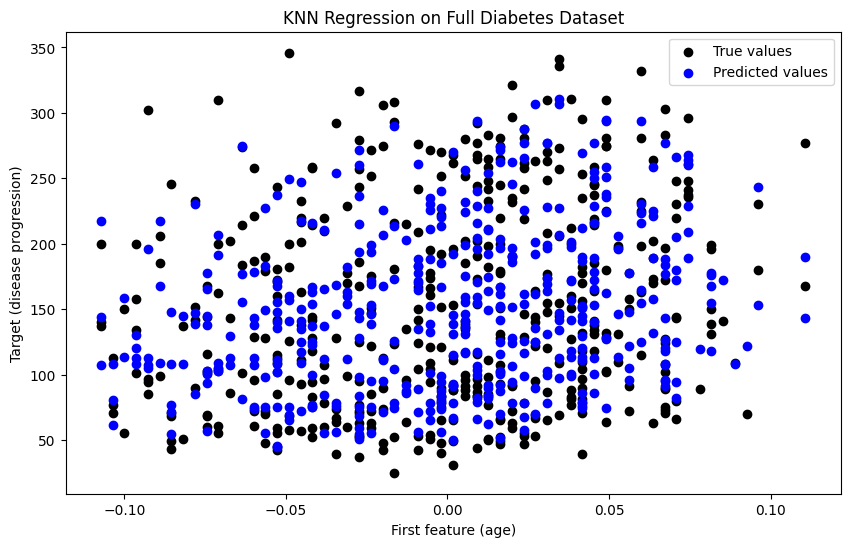

In [76]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_scaled, y)

y_pred = knn_reg.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='black', label='True values')
plt.scatter(X[:, 0], y_pred, color='blue', label='Predicted values')
plt.xlabel('First feature (age)')
plt.ylabel('Target (disease progression)')
plt.title('KNN Regression on Full Diabetes Dataset')
plt.legend()
plt.show()

#Наивный Байес

In [78]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [79]:
data.data.shape

(569, 30)

In [94]:
X = data.data[:,:2]
y = data.target

In [81]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

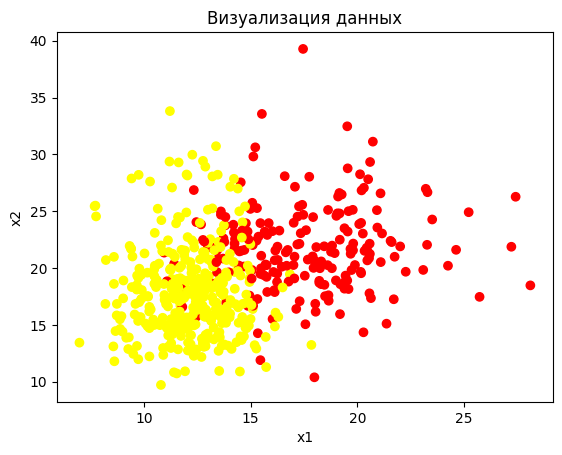

In [84]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Визуализация данных")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

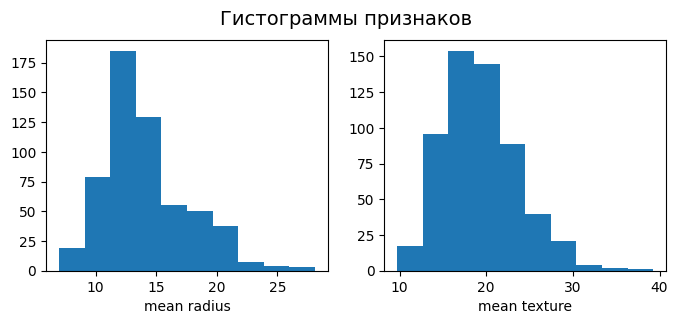

In [85]:
plt.figure(figsize=(8, 3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [86]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

In [87]:
gaussian_nb.fit(X, y)

GaussianNB()

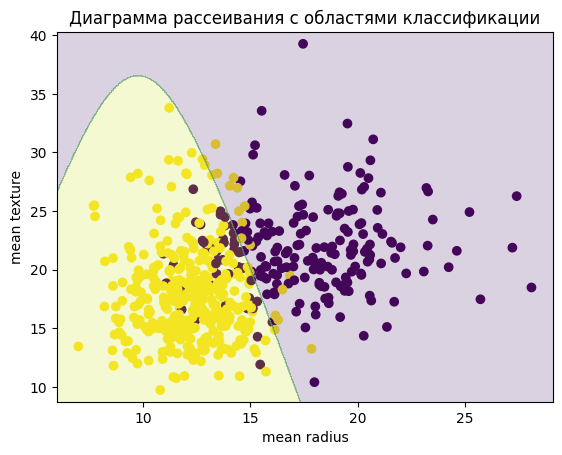

In [88]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, )
plt.contourf(X0_grid, X1_grid, Z, alpha=0.2)


plt.title('Диаграмма рассеивания с областями классификации')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

In [89]:
y_pred = gaussian_nb.predict(X)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [95]:
from sklearn.naive_bayes import MultinomialNB
multinom_nb = MultinomialNB().fit(X, y)
y_pred = multinom_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[ 36 176]
 [  7 350]]
Accuracy=  0.6783831282952548
F1_score=  0.7927519818799547


In [96]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB().fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[134  78]
 [136 221]]
Accuracy=  0.6239015817223199
F1_score=  0.6737804878048781


In [97]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB().fit(X, y)
y_pred = bernoulli_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


In [98]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [99]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


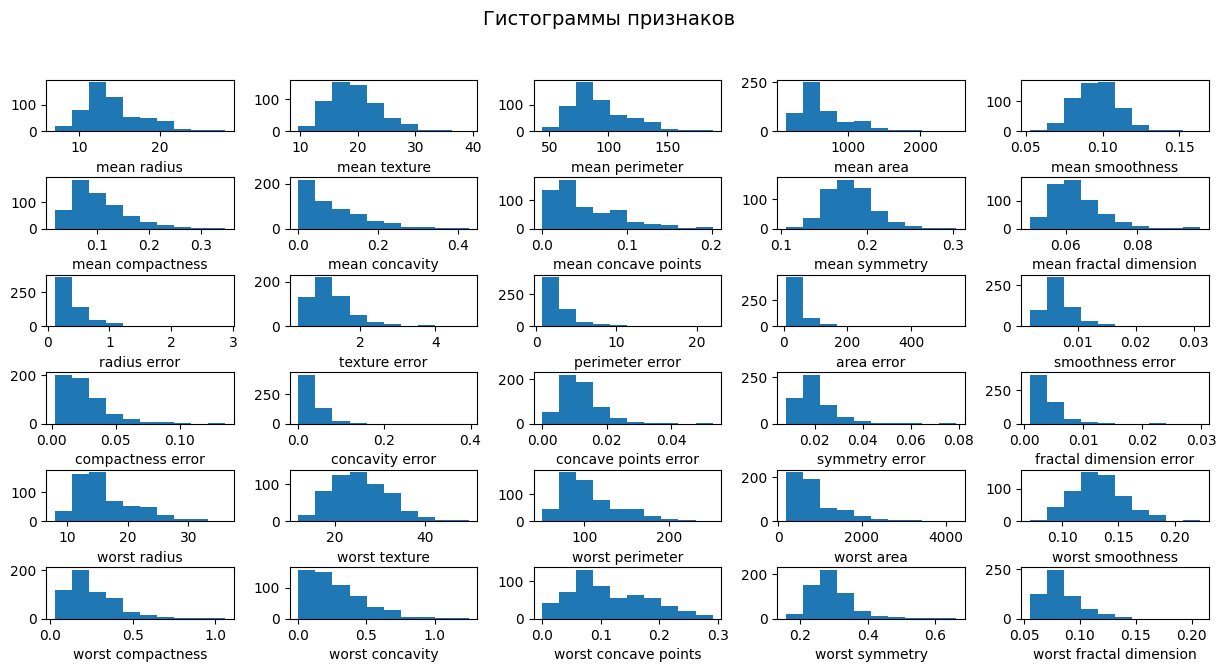

In [100]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [103]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'],
             axis=1)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concave points  mean symmetry  \
0           0.27760              0.14710         0.2419   
1           0.07864              0.07017         0.1812   
2           0.15990              0.12790         0.2069   
3           0.28390              0.10520         0.2597   
4           0.13280              0.10430         0.1809   

   mean fractal dimension  texture error  ...  concave points error  \
0                 0.07871         0.9053  ...               0.01587   
1                 0.05667         0.7339  ...               0.01340   
2                 0.05999         0.7869  ...               0.02058   
3                 0.09744         1.1560  ...               0.01867   
4                 0.05883         0.7813  ...               0.01885   

   symmetry error  worst radius  worst texture  worst perimeter  \
0         0.03003         25.38          17.33           184.60   
1         0.01389         24.99          23.41           158.80   
2         0.02250         23.57          25.53           152.50   
3         0.05963         14.91          26.50            98.87   
4         0.01756         22.54          16.67           152.20   

   worst smoothness  worst compactness  worst concave points  worst symmetry  \
0            0.1622             0.6656                0.2654          0.4601   
1            0.1238             0.1866                0.1860          0.2750   
2            0.1444             0.4245                0.2430          0.3613   
3            0.2098             0.8663                0.2575          0.6638   
4            0.1374             0.2050                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 21 columns]

In [104]:
X = df
y = data.target
X.shape, y.shape

((569, 21), (569,))

In [106]:
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


##Доп задания

###задание 2

In [107]:
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

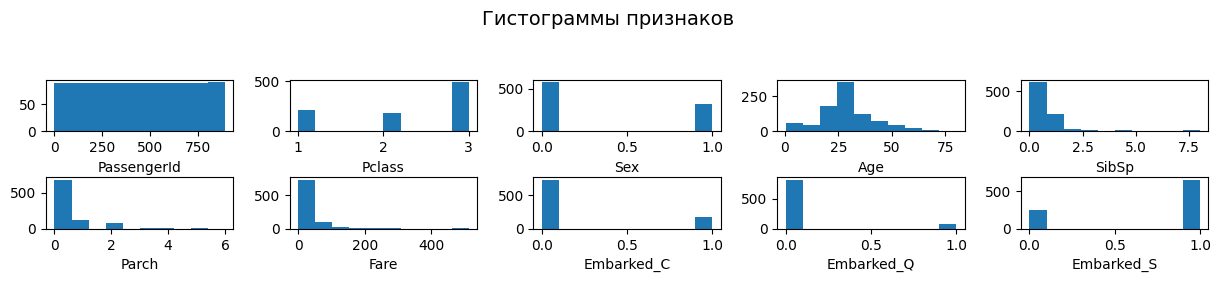

In [111]:
features_df = df.drop(columns=['Survived'])
f = plt.figure(figsize=(15, 7))
for i, column in enumerate(features_df.columns):
    plt.subplot(6, 5, i+1)
    plt.hist(features_df[column])
    plt.xlabel(column)

f.subplots_adjust(hspace=0.9, wspace=0.3)
plt.suptitle('Гистограммы признаков', fontsize=14)
plt.show()

In [112]:
df = df.drop(['PassengerId'], axis = 1)
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500           0           0   
1         1       1    1  38.0      1      0  71.2833           1           0   
2         1       3    1  26.0      0      0   7.9250           0           0   
3         1       1    1  35.0      1      0  53.1000           0           0   
4         0       3    0  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [113]:
X = df
y = df['Survived']
X.shape, y.shape

((891, 10), (891,))

In [114]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[549   0]
 [  0 342]]
Accuracy=  1.0
F1_score=  1.0


In [115]:
from sklearn.naive_bayes import MultinomialNB
multinom_nb = MultinomialNB().fit(X, y)
y_pred = multinom_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[460  89]
 [128 214]]
Accuracy=  0.7564534231200898
F1_score=  0.6635658914728683


In [117]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB().fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[458  91]
 [122 220]]
Accuracy=  0.7609427609427609
F1_score=  0.6738131699846861


In [116]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB().fit(X, y)
y_pred = bernoulli_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[549   0]
 [  0 342]]
Accuracy=  1.0
F1_score=  1.0


###Задание 3

In [124]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [125]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis = 1)
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [130]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


<ipython-input-130-3ba2825214c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [131]:
X = df
y = df['Survived']
X.shape, y.shape

((891, 6), (891,))

In [132]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[549   0]
 [  0 342]]
Accuracy=  1.0
F1_score=  1.0


In [133]:
from sklearn.naive_bayes import MultinomialNB
multinom_nb = MultinomialNB().fit(X, y)
y_pred = multinom_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[461  88]
 [133 209]]
Accuracy=  0.7519640852974186
F1_score=  0.6541471048513302


In [134]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB().fit(X, y)
y_pred = complement_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[456  93]
 [125 217]]
Accuracy=  0.755331088664422
F1_score=  0.6656441717791411


In [135]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB().fit(X, y)
y_pred = bernoulli_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[549   0]
 [  0 342]]
Accuracy=  1.0
F1_score=  1.0
